# Introduction
---

Welcome back! This is my second project with python. In here, maybe a little bit different from the project before. At this project, I start to used modeling algorithm to solve a task. The algorithm I used are <u>Supervised Learning</u> method with problem about prediction price tikcet of flight. I also to used <u>Hyperparameter Tunning</u> to search the best hyperparameter I can choose. Last but not least, I create some deployment application with <u>Streamlit</u> and store to <u>HuggingFace</u>.

If you like to tell me something about my project, feel free!

## Objectives

In this *project*, I take the perspective of a *Data Scientist* who is asked to <u>create a model that predicts the price of an airplane ticket</u> for a *customer* who uses flight transportation. I hope this prediction model will be able to give him an idea of ​​the money he needs to prepare when he wants to travel by plane.

Therefore, there are several things must I did, that is:
1. prepare data for modeling,
2. using the *Supervised Learning* method (*KNN*, *SVM*, *Decision Tree*, *Random Forest*, *Boosting*) in the concept of *Machine Learning*,
3. optimize the best modeling using *Hyperparameter Tunning*, and
4. create a *deployment*.

# Import Libraries
---

This section will be contain all libraries I used in this project.

In [1]:
# import library

import pickle
import json
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import root_mean_squared_error

If you've run through all the libraries, make sure to jump to the samples section (I've written notes there). You will be directed to load the sample dataset I've been prepared. 

# Data Loading
---

## Loading the Data

In [6]:
# import csv file to dataframe

df = pd.read_csv('itineraries_random_2M.csv')

# show top 10 data

df.head(10)

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,620cd51404373b9bdbbc46a0b657573c,2022-05-29,2022-06-18,LAX,ATL,Y0N,PT4H19M,0,False,False,...,1655606940,2022-06-18T22:49:00.000-04:00,ATL,LAX,Delta,DL,Airbus A321,15540,1943,coach
1,8622d132e890b398c0ad1d62b0232f54,2022-05-03,2022-06-24,CLT,LAX,MA0OA0MQ,PT8H10M,0,False,False,...,1656078240||1656103200,2022-06-24T09:44:00.000-04:00||2022-06-24T13:4...,ATL||LAX,CLT||ATL,Delta||Delta,DL||DL,Boeing 717||Airbus A321,4440||16680,228||1943,coach||coach
2,6f419788769ddb3802d047272ad0a54d,2022-05-02,2022-06-30,LGA,ATL,LAVQA0ML,PT11H54M,1,False,False,...,1656645360||1656676380,2022-06-30T23:16:00.000-04:00||2022-07-01T07:5...,MIA||ATL,LGA||MIA,Delta||Delta,DL||DL,Boeing 737-800||Boeing 737-900,11820||6780,1104||596,coach||coach
3,41f3cd0a63603895e13b5b77630bd84e,2022-06-10,2022-08-04,LAX,SFO,MH7OASMN,PT1H20M,0,False,False,...,1659669600,2022-08-04T20:20:00.000-07:00,SFO,LAX,Alaska Airlines,AS,Embraer 175,4800,339,coach
4,7f5d8684b672dd3593e30ee946264c31,2022-06-24,2022-07-20,LGA,DFW,LAVQA0BQ,PT6H41M,0,True,False,...,1658337240||1658351760,2022-07-20T13:14:00.000-04:00||2022-07-20T16:1...,ATL||DFW,LGA||ATL,Delta||Delta,DL||DL,Airbus A320||Airbus A321,9540||8460,762||725,coach||coach
5,5b5f142a97c3749a57da4d869b0540e2,2022-04-19,2022-04-30,DFW,DEN,SAA1AKEN,PT2H6M,0,False,False,...,1651363800,2022-04-30T18:10:00.000-06:00,DEN,DFW,United,UA,Airbus A320,7560,650,coach
6,50cdff822b37c021fda601f0ebec43aa,2022-04-27,2022-06-17,LAX,PHL,QAA3AKEN,PT7H28M,0,False,False,...,1655489580||1655501280,2022-06-17T13:13:00.000-05:00||2022-06-17T17:2...,ORD||PHL,LAX||ORD,United||United,UA||UA,Boeing 757-300||Airbus A320,15180||7980,1745||672,coach||coach
7,cbfd5d54c96d342db8b3f83e584137d0,2022-06-19,2022-07-03,BOS,IAD,SAA3AHES,PT3H30M,0,False,False,...,1656898680||1656906000,2022-07-03T21:38:00.000-04:00||2022-07-03T23:4...,EWR||IAD,BOS||EWR,United||United,UA||UA,Embraer 175 (Enhanced Winglets)||Boeing 737-700,5280||5100,185||221,coach||coach
8,6ec760aa789238e92d907edd90478948,2022-04-28,2022-05-01,MIA,DFW,L3AIZNN1,PT3H20M,0,False,False,...,1651408800,2022-05-01T07:40:00.000-05:00,DFW,MIA,American Airlines,AA,Boeing 737-800,12000,1115,coach
9,51d23671ceccf91a1f4b70330db0db87,2022-04-18,2022-05-28,EWR,CLT,NVAHZNB1,PT1H51M,0,True,False,...,1653739260,2022-05-28T08:01:00.000-04:00,CLT,EWR,American Airlines,AA,Boeing 737-800,6660,545,coach


In [7]:
# show 10 data from bottom

df.tail(10)

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
1999990,76eb2f5a77ce21c8d987bfd4005e9556,2022-06-22,2022-07-29,BOS,LAX,QAA2AKES,PT8H7M,1,False,False,...,1659143640||1659167100,2022-07-29T21:14:00.000-04:00||2022-07-30T00:4...,IAD||LAX,BOS||IAD,United||United,UA||UA,Boeing 737-800||Boeing 737-900,5760||19380,406||2295,coach||coach
1999991,945e95648665bb871694727a6005b089,2022-05-12,2022-06-07,JFK,ATL,VAVNA0BC,PT2H43M,1,True,False,...,1654661580,2022-06-08T00:13:00.000-04:00,ATL,JFK,Delta,DL,Boeing 737-900,9780,762,coach
1999992,01a6ee3d87ab74b51765b76e4189e6a1,2022-05-30,2022-06-12,MIA,JFK,QAA7AHEN,PT11H45M,0,False,False,...,1655041260||1655071200,2022-06-12T08:41:00.000-05:00||2022-06-12T18:0...,ORD||JFK,MIA||ORD,United||Delta,UA||DL,Boeing 737-800||Canadair Regional Jet 900,12360||9180,1192||720,coach||coach
1999993,aa0779b0edefeb9a670fab321f06aeaf,2022-06-19,2022-08-05,DEN,OAK,QAA0OKEN,PT5H48M,0,False,False,...,1659751320||1659763260,2022-08-05T19:02:00.000-07:00||2022-08-05T22:2...,LAX||OAK,DEN||LAX,United||Delta,UA||DL,Boeing 737-800||Embraer 175 (Enhanced Winglets),8940||4560,848||338,coach||coach
1999994,65372cb10aad700a88e8d79280c2b9e2,2022-06-20,2022-07-03,LAX,DEN,N8AHZNN3,PT4H23M,0,False,False,...,1656872100||1656882480,2022-07-03T11:15:00.000-07:00||2022-07-03T15:0...,PHX||DEN,LAX||PHX,American Airlines||American Airlines,AA||AA,Airbus A319||Airbus A321,5400||6660,370||590,coach||coach
1999995,69f98894d9c8312be8cf13e70f2d05d9,2022-05-27,2022-07-06,ATL,OAK,XAVNA0ML,PT14H54M,1,False,False,...,1657169880||1657203000||1657215540,2022-07-06T23:58:00.000-05:00||2022-07-07T07:1...,DFW||LAX||OAK,ATL||DFW||LAX,Delta||Delta||Delta,DL||DL||DL,Airbus A321||Airbus A320||Embraer 175 (Enhance...,7980||11400||4740,725||1238||338,coach||coach||coach
1999996,bd97f4d5cb15c1f3e5857d38159d07e1,2022-06-26,2022-07-03,BOS,IAD,V0AJZNN1,PT6H28M,0,False,False,...,1656850980||1656865680,2022-07-03T08:23:00.000-04:00||2022-07-03T12:2...,CLT||IAD,BOS||CLT,American Airlines||American Airlines,AA||AA,Airbus A321||Canadair Regional Jet 900,8580||5340,728||327,coach||coach
1999997,406fe429b9b270930048b327b69874ab,2022-05-29,2022-07-15,DFW,SFO,MAVNA0MC,PT7H26M,0,False,False,...,1657917420||1657934040,2022-07-15T14:37:00.000-06:00||2022-07-15T18:1...,SLC||SFO,DFW||SLC,Delta||Delta,DL||DL,||Airbus A319,10140||7440,992||599,coach||coach
1999998,269d8182f5a506851c47ab0ee595f0db,2022-06-24,2022-07-15,LAX,IAD,KAUOA0MQ,PT10H10M,1,False,False,...,1657964880||1657986300,2022-07-16T05:48:00.000-04:00||2022-07-16T11:4...,ATL||IAD,ONT||ATL,Delta||Delta,DL||DL,Airbus A321||Boeing 717,15180||6300,1897||541,coach||coach
1999999,2326ebcda0fc1b30edf255a5508cf075,2022-05-02,2022-05-07,JFK,DFW,S3AHZNB3,PT8H59M,0,True,False,...,1651936260||1651958940,2022-05-07T10:11:00.000-05:00||2022-05-07T16:2...,ORD||DFW,JFK||ORD,American Airlines||American Airlines,AA||AA,Boeing 737 MAX 8||Boeing 737-800,9660||8940,720||799,coach||coach


In [8]:
# check infomation about dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 27 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   legId                              object 
 1   searchDate                         object 
 2   flightDate                         object 
 3   startingAirport                    object 
 4   destinationAirport                 object 
 5   fareBasisCode                      object 
 6   travelDuration                     object 
 7   elapsedDays                        int64  
 8   isBasicEconomy                     bool   
 9   isRefundable                       bool   
 10  isNonStop                          bool   
 11  baseFare                           float64
 12  totalFare                          float64
 13  seatsRemaining                     int64  
 14  totalTravelDistance                float64
 15  segmentsDepartureTimeEpochSeconds  object 
 16  segmentsDepartureT

* *The volume* of this dataset is too large for me to create a model. Later I will take samples using the *Slovin* technique.
* The given `info()` does not output how many **null** data there are in this dataset (it may be too much data).
* It is known from this dataset that there are 3 types of data, namely numeric, boolean, and object. Next, it will be grouped into what includes numerical and categorical data.

## Take the Sample

In [9]:
# create a function to take the sample I need

def hitung_ukuran_sampel(populasi, margin_error):
    # calculate the value of K
    K = populasi / (1 + populasi * (margin_error ** 2))
    
    # calculate the sample
    ukuran_sampel = populasi / K
    
    return int(ukuran_sampel)

In [10]:
# set the volume of dataset and the margin of error

populasi = 2000000  # this dataset up to 2 million rows
margin_error = 0.05  # used the 5% of margin
tingkat_kepercayaan = 0.95  # used 95% to interval of confidence

# calculate the sample

ukuran_sampel = hitung_ukuran_sampel(populasi, margin_error)
print("Ukuran sampel yang dibutuhkan:", round(ukuran_sampel))

Ukuran sampel yang dibutuhkan: 5001


In [11]:
# take the sample with randomize the dataset

df_sample = df.sample(n=ukuran_sampel, random_state=42)
df_sample

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
1828401,3a915559d50ebeefaea42960d9cf044e,2022-06-25,2022-08-13,EWR,ATL,HA3OX0MQ,PT2H16M,0,False,False,...,1660422360,2022-08-13T16:26:00.000-04:00,ATL,EWR,Delta,DL,Boeing 717,8160,762,coach
1200071,9e417bfce665e03ce32f97b35fb8b338,2022-06-22,2022-06-27,BOS,OAK,TNR,PT16H13M,0,False,False,...,1656352500||1656389880,2022-06-27T10:55:00.000-07:00||2022-06-27T21:1...,LAS||OAK,BOS||LAS,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,21000||5640,None||None,coach||coach
194849,aa410ec5ad9f4d51274dd37fb7a67bc4,2022-06-18,2022-08-02,DEN,DTW,HA0OA0MQ,PT7H45M,0,False,False,...,1659468600||1659482100,2022-08-02T15:30:00.000-04:00||2022-08-02T19:1...,LGA||DTW,DEN||LGA,Delta||Delta,DL||DL,Boeing 737-800||Airbus A320,14400||7800,1621||485,coach||coach
1629054,813abf44ba72d5d910e5f292221e9912,2022-04-24,2022-05-18,BOS,LGA,NUAZXNN3,PT3H43M,0,False,False,...,1652904540||1652911980,2022-05-18T16:09:00.000-04:00||2022-05-18T18:1...,DCA||LGA,BOS||DCA,American Airlines||American Airlines,AA||AA,Airbus A319||Airbus A319,5940||4380,406||221,coach||coach
191144,c919a270a0ac8656459aa97fc896179d,2022-06-04,2022-06-24,BOS,JFK,QAUOA0MQ,PT1H31M,0,False,False,...,1656106200,2022-06-24T17:30:00.000-04:00,JFK,BOS,Delta,DL,Airbus A220-100,5460,185,coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489481,c93ea368d400936da0ef3a5114bcadf6,2022-04-22,2022-06-17,PHL,DFW,UAUQA0MQ,PT11H5M,0,False,False,...,1655480700||1655514120,2022-06-17T11:45:00.000-04:00||2022-06-17T20:0...,DTW||DFW,PHL||DTW,Delta||Delta,DL||DL,Airbus A319||Airbus A319,6480||10320,447||995,coach||coach
1289373,019f8cd9fc95d1201a783800f2c9e4aa,2022-05-20,2022-05-27,SFO,OAK,LH0OAVMN,PT7H12M,0,False,False,...,1653669000||1653689520,2022-05-27T09:30:00.000-07:00||2022-05-27T15:1...,LAX||OAK,SFO||LAX,Alaska Airlines||Delta,AS||DL,Airbus A320||Embraer 175 (Enhanced Winglets),5400||4620,339||338,coach||coach
163789,745eb9210b20e378b97a7711eaf53ea3,2022-05-28,2022-07-13,SFO,BOS,K0AJZNN1,PT8H47M,0,False,False,...,1657746300||1657770780,2022-07-13T14:05:00.000-07:00||2022-07-13T23:5...,PHX||BOS,SFO||PHX,American Airlines||American Airlines,AA||AA,Boeing 737-800||,7140||18000,652||2296,coach||coach
1773932,8c2f50766b5369f85f5bb8a96a3de25b,2022-06-08,2022-06-17,LAX,BOS,UAA0OHEN,PT7H55M,0,False,False,...,1655498160||1655507700,2022-06-17T16:36:00.000-04:00||2022-06-17T19:1...,EWR||BOS,LAX||EWR,United||United,UA||UA,||Boeing 737-700,18960||5400,2458||185,coach||coach


In [5]:
# save to a new csv and I will store to github later

df_sample.to_csv('flight_price.csv', index=False)

## Here

---

After run the library, start run again here and don't run above this because I don't save the original dataset (too large). If you forced to run, it must be error. Actually, the code above are step to choose the sample dataset with Slovin method and I don't change the dataset anything at all.

In [2]:
# open the sample file

df_sample = pd.read_csv('flight_price.csv')
df_sample

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,3a915559d50ebeefaea42960d9cf044e,2022-06-25,2022-08-13,EWR,ATL,HA3OX0MQ,PT2H16M,0,False,False,...,1660422360,2022-08-13T16:26:00.000-04:00,ATL,EWR,Delta,DL,Boeing 717,8160,762,coach
1,9e417bfce665e03ce32f97b35fb8b338,2022-06-22,2022-06-27,BOS,OAK,TNR,PT16H13M,0,False,False,...,1656352500||1656389880,2022-06-27T10:55:00.000-07:00||2022-06-27T21:1...,LAS||OAK,BOS||LAS,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,21000||5640,None||None,coach||coach
2,aa410ec5ad9f4d51274dd37fb7a67bc4,2022-06-18,2022-08-02,DEN,DTW,HA0OA0MQ,PT7H45M,0,False,False,...,1659468600||1659482100,2022-08-02T15:30:00.000-04:00||2022-08-02T19:1...,LGA||DTW,DEN||LGA,Delta||Delta,DL||DL,Boeing 737-800||Airbus A320,14400||7800,1621||485,coach||coach
3,813abf44ba72d5d910e5f292221e9912,2022-04-24,2022-05-18,BOS,LGA,NUAZXNN3,PT3H43M,0,False,False,...,1652904540||1652911980,2022-05-18T16:09:00.000-04:00||2022-05-18T18:1...,DCA||LGA,BOS||DCA,American Airlines||American Airlines,AA||AA,Airbus A319||Airbus A319,5940||4380,406||221,coach||coach
4,c919a270a0ac8656459aa97fc896179d,2022-06-04,2022-06-24,BOS,JFK,QAUOA0MQ,PT1H31M,0,False,False,...,1656106200,2022-06-24T17:30:00.000-04:00,JFK,BOS,Delta,DL,Airbus A220-100,5460,185,coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,c93ea368d400936da0ef3a5114bcadf6,2022-04-22,2022-06-17,PHL,DFW,UAUQA0MQ,PT11H5M,0,False,False,...,1655480700||1655514120,2022-06-17T11:45:00.000-04:00||2022-06-17T20:0...,DTW||DFW,PHL||DTW,Delta||Delta,DL||DL,Airbus A319||Airbus A319,6480||10320,447||995,coach||coach
4997,019f8cd9fc95d1201a783800f2c9e4aa,2022-05-20,2022-05-27,SFO,OAK,LH0OAVMN,PT7H12M,0,False,False,...,1653669000||1653689520,2022-05-27T09:30:00.000-07:00||2022-05-27T15:1...,LAX||OAK,SFO||LAX,Alaska Airlines||Delta,AS||DL,Airbus A320||Embraer 175 (Enhanced Winglets),5400||4620,339||338,coach||coach
4998,745eb9210b20e378b97a7711eaf53ea3,2022-05-28,2022-07-13,SFO,BOS,K0AJZNN1,PT8H47M,0,False,False,...,1657746300||1657770780,2022-07-13T14:05:00.000-07:00||2022-07-13T23:5...,PHX||BOS,SFO||PHX,American Airlines||American Airlines,AA||AA,Boeing 737-800||,7140||18000,652||2296,coach||coach
4999,8c2f50766b5369f85f5bb8a96a3de25b,2022-06-08,2022-06-17,LAX,BOS,UAA0OHEN,PT7H55M,0,False,False,...,1655498160||1655507700,2022-06-17T16:36:00.000-04:00||2022-06-17T19:1...,EWR||BOS,LAX||EWR,United||United,UA||UA,||Boeing 737-700,18960||5400,2458||185,coach||coach


In [3]:
# check the information dataframe

df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   legId                              5001 non-null   object 
 1   searchDate                         5001 non-null   object 
 2   flightDate                         5001 non-null   object 
 3   startingAirport                    5001 non-null   object 
 4   destinationAirport                 5001 non-null   object 
 5   fareBasisCode                      5001 non-null   object 
 6   travelDuration                     5001 non-null   object 
 7   elapsedDays                        5001 non-null   int64  
 8   isBasicEconomy                     5001 non-null   bool   
 9   isRefundable                       5001 non-null   bool   
 10  isNonStop                          5001 non-null   bool   
 11  baseFare                           5001 non-null   float

* You can see **null** data detected in the `totalTravelDistance`, `segmentsEquipmentDescription` and `segmentsDistance` columns.
* A *new volume* of the sample dataset is 5001 rows with 27 columns.

# Exploratory Data Analysis
---

In this section, I will did a few exploration about dataset we have.

## EDA - Description of Columns

After I tried to find information about this dataset outside the provider (*Kaggle*), there was information that I needed to share. This dataset was taken from the website *Expedia* which is a technology company from *US* that provides travel and transportation via *online*. The data presented in it is *track record* data of customer orders at one time who ordered tickets for use in the next time.

However, the data provided does not through the process of normalization in the *database*. I know that when a *customer* takes a trip that requires a stopover on their flight route. The data in several columns has more than 1 value and is only separated by characters (`||`).

The following is a more detailed explanation regarding this dataset columns.

| Columns | Description | Data |
| --- | --- | ---|
|`legId`| In simple way, this is a unique code on each plane ticket | A combination of numbers and letters |
|`searchDate`| Date when this data was accessed from *Expedia* (a US technology company that provides *online* travel) | 2022-04-16 <br>...<br>  2022-06-26 |
|`flightDate`| Flight date | 2022-04-17 <br>...<br>  2022-08-23 |
|`startingAirport`| IATA code of the airport name for departure | Contains 3 capital letters |
|`destinationAirport`| IATA code of the airport name for arrival | Contains 3 capital letters |
|`fareBasisCode`| A kind of code regarding the basic fare for airplane transportation | A combination of numbers and letters |
|`travelDuration`| Total duration of the trip written in hours and minutes (including waiting time for the next plane schedule if they transit) | String |
|`elapsedDays`| Number of days spent, usually 0 (if more than 0 it means the trip lasted for another day) | 0 & 1 |
|`isBasicEconomy`| Airline ticket class whether *basic economy* or not | *True* = *Yes* <br> *False* = *No* |
|`isRefundable`| Are tickets *refundable* or not | Just contain *False* |
|`isNonStop`| The flight status is whether it has only flown once or there is a stopover | *True* = *Yes* <br> *False* = *No* |
|`baseFare`| Base ticket price in USD | 5 - 4408 |
|`totalFare`| Ticket prices after adding taxes and other fees | 43 - 4753 |
|`seatsRemaining`| Number of remaining seats | 0 - 10 |
|`totalTravelDistance`| The total distance traveled in miles | 97 - 3686 |
|`segmentsDepartureTimeEpochSeconds`| Departure time written in *Unix Epoch Time* format (if transit, there will be two data separated by two straight lines) | *Unix Epoch Time* |
|`segmentsDepartureTimeRaw`| Departure time written in the format YYYY-MM-DDThh:mm:ss.000±[hh]:00 (if transit, there will be two data separated by two straight lines) | *Date* & *Time* |
|`segmentsArrivalTimeEpochSeconds`| Arrival time written in *Unix Epoch Time* format (if transit, there will be two data separated by two straight lines) | *Unix Epoch Time* |
|`segmentsArrivalTimeRaw`| Arrival time written in the format YYYY-MM-DDThh:mm:ss.000±[hh]:00 (if transit, there will be two data separated by two straight lines) | *Date* & *Time* |
|`segmentsArrivalAirportCode`| IATA code for the airport of arrival (if transit, there will be two data separated by two straight lines) | Contains 3 capital letters |
|`segmentsDepartureAirportCode`| IATA code for the departure airport (if transit, there will be two data separated by two straight lines) | Contains 3 capital letters |
|`segmentsAirlineName`| The airline that will serve the flight | String |
|`segmentsAirlineCode`| Code of the airline that will serve the flight | Contains 2 capital letters |
|`segmentsEquipmentDescription`| The type of aircraft that will serve the flight | Boeing <br> Airbus <br> ... <br> etc |
|`segmentsDurationInSeconds`| Time that only calculates the flight duration in seconds & does not include waiting time (if transiting, there will be two data separated by two straight lines) | Number |
|`segmentsDistance`| Flight distance traveled | Number |
|`segmentsCabinCode`| In-flight cabin type code | *First* <br> *Business* <br> ... |

## EDA - Duplicated Data

In [4]:
# check duplicated

df_sample.duplicated().sum()

0

* There are no duplicate data in the dataset.

## EDA - Comparison `baseFare` dan `totalFare`  

As explained at the beginning, the difference between `baseFare` and `totalFare` is that there are other costs included in `totalFare` so the price is definitely higher than `baseFare`.

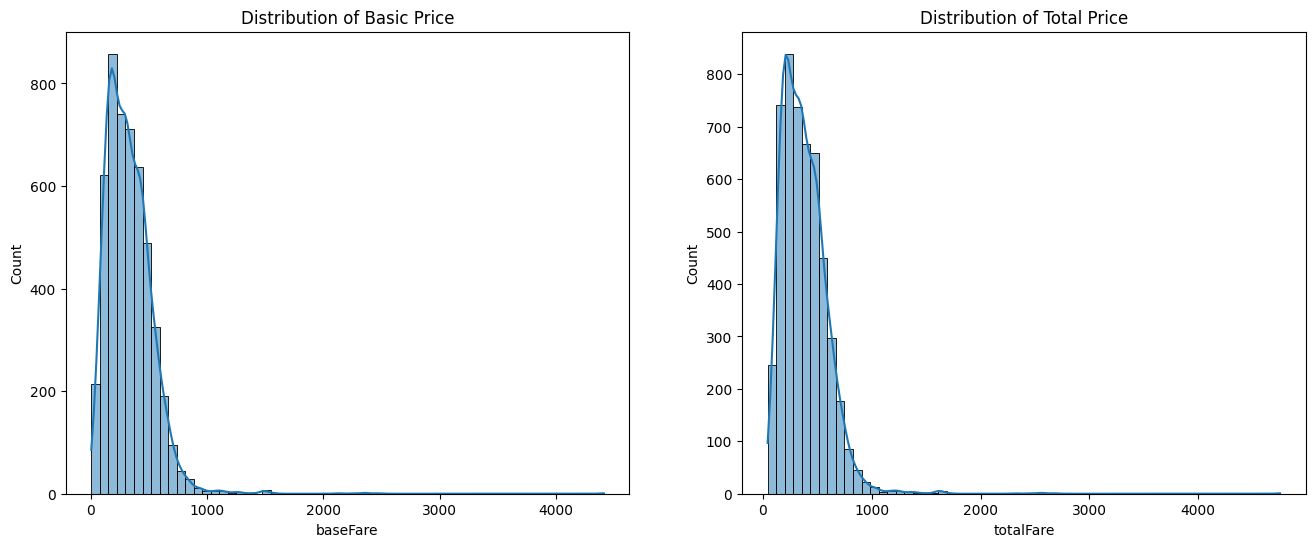

In [5]:
plt.figure(figsize=(16, 6))

# distribution plot of baseFare
plt.subplot(1, 2, 1)
sns.histplot(df_sample['baseFare'], kde=True, bins=60)
plt.title('Distribution of Basic Price')

# distribution plot of totalFare
plt.subplot(1, 2, 2)
sns.histplot(df_sample['totalFare'], kde=True, bins=60)
plt.title('Distribution of Total Price')

plt.show()

In [24]:
print(f"Average of BaseFare: {df_sample['baseFare'].mean()}")
print(f"Average of TotalFare: {df_sample['totalFare'].mean()}")
print(f"The difference: {round((df_sample['totalFare'].mean()/df_sample['baseFare'].mean())*100 - 100, 2)}%")

Average of BaseFare: 330.75559088182365
Average of TotalFare: 381.5948630273945
The difference: 15.37%


* At first glance it doesn't appear to be much different in data distribution, it's just that there is a slight difference where <u>the value of `totalFare` is higher than `baseFare`</u>.
* This means that it is possible that the additional fee on `totalFare` will not cause a significant increase in ticket prices.
* However, if we do the calculations, it can be seen that <u>the price increase is 15.37%</u> from `baseFare`. Maybe this increase is not up to a fifth, but for some people, this is quite a large increase too.

## EDA - Comparison Flight Mode (Transit and Non-Stop)

In this dataset, `isNonStop` information is given which indicates whether the flight made a stopover or flew once in one trip.

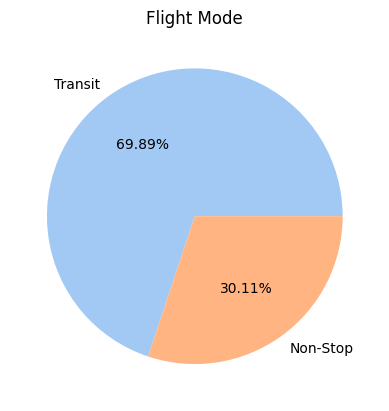

In [ ]:
# define the color
colors = sns.color_palette('pastel')[0:5]

# define the label
label = ['Transit', 'Non-Stop']

# make the plot with the color and label
plt.pie(df_sample['isNonStop'].value_counts(), labels = label, colors = colors, autopct='%.2f%%')
plt.title('Flight Mode')
plt.show()

In [23]:
print(f"Average of TotalFare if passenger do more one flight in a single trip: {df_sample['totalFare'][df_sample['isNonStop'] == False].mean()}")
print(f"Averege of TotalFare if passenger just do one flight in a single trip: {df_sample['totalFare'][df_sample['isNonStop'] == True].mean()}")
print(f"The percentage of difference price is: {round(df_sample['totalFare'][df_sample['isNonStop'] == False].mean()/df_sample['totalFare'][df_sample['isNonStop'] == True].mean()*100 - 100, 2)}%")

Average of TotalFare if passenger do more one flight in a single trip: 421.59862088698145
Averege of TotalFare if passenger just do one flight in a single trip: 288.75745683930944
The percentage of difference price is: 46.0%


* If we look at the plot, it appears that around <u>70% of the flights in this dataset need transit</u>. This causes plane ticket prices to be around <u>46% more expensive</u> than the average price of a single flight ticket per trip. 
* Even without doing any calculations, when we travel by plane on more than one flight, it must be more costly than one flight.

## EDA - Comparison by the Type of Ticket

Here, we will see the difference of price with the type of ticket every passenger in general.

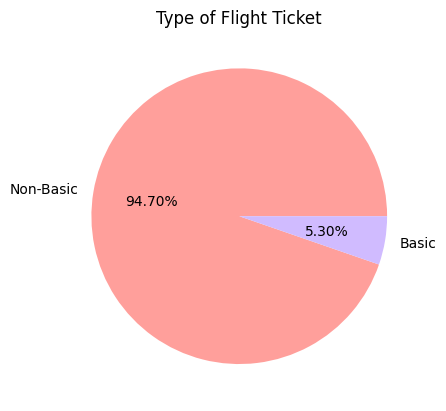

In [ ]:
# define the color
colors = sns.color_palette('pastel')[3:6]

# define the label
label = ['Non-Basic', 'Basic']

# make the plot
plt.pie(df_sample['isBasicEconomy'].value_counts(), labels = label, colors = colors, autopct='%.2f%%')
plt.title('Type of Flight Ticket')
plt.show()

In [18]:
print(f"Average of TotalFare with the type of ticket is non-basic economy: {df_sample['totalFare'][df_sample['isBasicEconomy'] == False].mean()}")
print(f"Average of TotalFare with the type of ticket is basic economy: {df_sample['totalFare'][df_sample['isBasicEconomy'] == True].mean()}")
print(f"The percentage of diffrence price: {round(df_sample['totalFare'][df_sample['isBasicEconomy'] == False].mean()/df_sample['totalFare'][df_sample['isBasicEconomy'] == True].mean()*100 - 100, 2)}%")

Average of TotalFare with the type of ticket is non-basic economy: 393.1807981418919
Average of TotalFare with the type of ticket is basic economy: 174.53452830188678
The percentage of diffrence price: 125.27%


* So far, we know that passengers with non-basic tickets dominate and the price has a difference of up to 125% from the price of a basic economy ticket.

## EDA - Comparison by the Day of Arrival

Now we will see whether the length of the trip in days (departing and arriving at the destination on the same day) affects the ticket price.

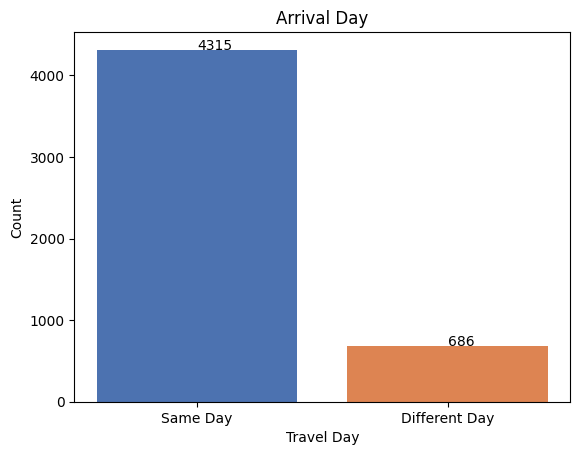

In [25]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
# make a label
categories = ['Same Day', 'Different Day']

# create the plot
plt.bar(categories, df_sample['elapsedDays'].value_counts(), color=sns.color_palette('deep'))
addlabels(categories, df_sample['elapsedDays'].value_counts())

# define the axis
plt.xlabel('Travel Day')
plt.ylabel('Count')
plt.title('Arrival Day')

# show plot
plt.show()

In [32]:
print(f"Average of TotalFare if passenger spend the whole day: {df_sample['totalFare'][df_sample['elapsedDays'] == 0].mean()}")
print(f"Average of TotalFare if passenger spend the trip with more one day: {df_sample['totalFare'][df_sample['elapsedDays'] == 1].mean()}")
print(f"The percentage of difference price: {round(df_sample['totalFare'][df_sample['elapsedDays'] == 1].mean()/df_sample['totalFare'][df_sample['elapsedDays'] == 0].mean()*100 - 100,2)}%")

Average of TotalFare if passenger spend the whole day: 369.76850984936266
Average of TotalFare if passenger spend the trip with more one day: 455.98365889212823
The percentage of difference price: 23.32%


In [38]:
# check the mode flight (Transit) by the time elapsed of day
df_sample['isNonStop'][df_sample['elapsedDays'] == 0].value_counts()

isNonStop
False    2890
True     1425
Name: count, dtype: int64

In [39]:
# check the mode flight (non-Transit) by the time elapsed of day
df_sample['isNonStop'][df_sample['elapsedDays'] == 1].value_counts()

isNonStop
False    605
True      81
Name: count, dtype: int64

* We know that <u>most passengers spend the time traveling in one day</u> (not 24 hours but a day).
* Upon further inspection, whether length of travel for one day or more, <u>passengers with more than one flight still dominate</u>. If you are aware, from the beginning, there are more passengers on more than one flight than passengers on only one flight.
* Another conclusion is that <u>it could be that passengers departed close to midnight and arrived in the morning</u> so they were recorded as having <u>traveled for more than one day</u>. However, <u>it cannot be denied that if someone's trip is that long (more than one day)</u>. So the average ticket price is <u>more expensive compared to passengers whose trip is only less than one day</u>.

## Notes

Apart from the exploration that has been carried out, several things were discovered and I will explain them briefly.
1. There are conditions where one ticket booking transaction contains two or more trips. The effect is that in one column there contain two or more data. Due to the presence of two or more data in a column, there is certainly a separation between the data in that column with characters (`||`).
2. Regarding the *missing values* that exist, the exact reason is still unknown. I assume that may be due to a *server*/*internet network* error when the *Expedia* website is accessed and cannot display all the information that should be available to *passenger* when making an order. For example, the travel distance is not available even though the ticket has been ordered.
3. In the next step, I will extract several columns to retrieve information that can be analyzed further (feature creation).
4. Based on exploration above, we know that flight mode, type of ticket, and the day of arrival have a correlation with the price (`TotalFare`) in general. For the another columns, I can't process to see the visualization because the data type is object and didn't have the same format. Such the data like that will be extracted.

# Feature Engineering
---

In this section, data will be preprocessed to be ready for use in the model.

## FE - Split Data

In [ ]:
# We split the data into train and test with a ratio of 80% train and 20% test and the random_state is 42
# We will not use legId and fareBasisCode because they only contain random (unique) combinations of numbers and letters and will not affect the model.
x_train,x_test,y_train,y_test = train_test_split(df_sample.drop(['totalFare', 'legId', 'fareBasisCode'], axis=1), df_sample[['totalFare']], test_size=0.2, random_state=42)

In [ ]:
# check the shape
x_train.shape, x_test.shape

((4000, 24), (1001, 24))

* We got 4000 data for *train set* and 1001 for *test set*.

## FE - Creation

For this section, I will remind you of the **Notes** in **EDA** where it is written that there is column data that contains more than one value. This makes it difficult when we want to carry out analysis where the data 'blends' with other data that should stand alone. Plus, when all the data is separated into separate columns it will also make things difficult because there will be columns whose contents are incomplete if the origin data doesn't have more than one value in that column.

Therefore, <u>I decided to take the first value from the column</u> that had more than one value with the consequence that I lost information regarding flights that occurred more than once but the data I took can be used more efficiently in the analysis process because there is nothing empty.

### Creation - `searchDate` and `flightDate` to `orderingDistance` and `monthDeparture`

The essence of this extraction is that I take information from `searchDate` and `flightDate` into data on the distance between ticket reservations and the departure time and month of departure. The reason is because `searchDate` and `flightDate` data do not have a large amount of data within one day and this is not a fixed amount. Moreover, this data can't be entered into the model for analysis so it is necessary to take parts that are useful for modeling.

In [ ]:
# change the data in the searchDate and flightDate columns to datetime
x_train['searchDate'] = pd.to_datetime(x_train['searchDate'], format='%Y-%m-%d')
x_train['flightDate'] = pd.to_datetime(x_train['flightDate'], format='%Y-%m-%d')

# for test set
x_test['searchDate'] = pd.to_datetime(x_test['searchDate'], format='%Y-%m-%d')
x_test['flightDate'] = pd.to_datetime(x_test['flightDate'], format='%Y-%m-%d')

In [ ]:
# search the difference in departure time with ticket orders and insert into a new column called orderingDistance
x_train['orderingDistance'] = (x_train['flightDate'] - x_train['searchDate']).dt.days
x_test['orderingDistance'] = (x_test['flightDate'] - x_test['searchDate']).dt.days

In [ ]:
# search the month departure and insert into a new column called monthDeparture
x_train['monthDeparture'] = x_train['flightDate'].dt.month
x_test['monthDeparture'] = x_test['flightDate'].dt.month

In [ ]:
# reset index
x_train_1 = x_train.reset_index(drop=True)
x_test_1 = x_test.reset_index(drop=True)

In [ ]:
# drop the old columns 
x_train_1 = x_train_1.drop(['searchDate', 'flightDate'], axis=1)
x_test_1 = x_test_1.drop(['searchDate', 'flightDate'], axis=1)

In [ ]:
# check
x_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   startingAirport                    4000 non-null   object 
 1   destinationAirport                 4000 non-null   object 
 2   travelDuration                     4000 non-null   object 
 3   elapsedDays                        4000 non-null   int64  
 4   isBasicEconomy                     4000 non-null   bool   
 5   isRefundable                       4000 non-null   bool   
 6   isNonStop                          4000 non-null   bool   
 7   baseFare                           4000 non-null   float64
 8   seatsRemaining                     4000 non-null   int64  
 9   totalTravelDistance                3696 non-null   float64
 10  segmentsDepartureTimeEpochSeconds  4000 non-null   object 
 11  segmentsDepartureTimeRaw           4000 non-null   objec

* New columns `orderingDistance` and `monthDeparture` were successfully created.

### Creation - `travelDuration` to `travelDurationInMinutes`

Dibagian ini kita akan mengganti `travelDuration` yang berisi data lamanya perjalanan termasuk waktu tunggu transit dengan format penulisan string campuran angka dan huruf menjadi `travelDurationInMinutes` yang berisi data waktu tersebut yang diubah kedalam bentuk menit. Dengan adanya perubahan ini, data pada kolom `travelDuration` bisa digunakan.

In [ ]:
# kita split data dalam kolom travelDuration dengan pemisah karakter ('H')
split_travel_train = x_train_1['travelDuration'].str.split('H', expand=True)
split_travel_test = x_test_1['travelDuration'].str.split('H', expand=True)

In [ ]:
# kita cek hasilnya
split_travel_train.head()

,0,1
0,PT7,3M
1,PT8,17M
2,PT4,7M
3,PT5,45M
4,PT7,3M


In [ ]:
# ini untuk test
split_travel_test.head()

,0,1
0,PT2,50M
1,PT2,15M
2,PT5,30M
3,PT6,30M
4,PT13,5M


In [ ]:
# kita buang karakter PT di kolom 0
split_travel_train[0] = split_travel_train[0].str.replace('PT', '')
split_travel_test[0] = split_travel_test[0].str.replace('PT', '')

In [ ]:
# kita cek masih adakah yang belum sesuai
split_travel_train[0].unique()

array(['7', '8', '4', '5', '1', '10', '6', '3', '14', '2', '9', '13',
       '11', '15', '17', '12', '18', '20', '16', '48M', '52M', '19', '23',
       '21'], dtype=object)

In [ ]:
# ini untuk test
split_travel_test[0].unique()

array(['2', '5', '6', '13', '9', '10', '3', '11', '4', '15', '7', '12',
       '8', '1', '16', '14', '51M', '19', '52M', '17', '18', '21', '59M'],
      dtype=object)

Insight:
* Masih ada yang belum sesuai letaknya. Jika angka tersebut berada disebelah kiri 'H' maka dia menunjukkan jam sementara dikanannya menunjukkan menit.
* Karena ada perjalanan yang tidak sampai 1 jam, maka waktu menit tersebut digolongkan kedalam waktu jam oleh pandas. Sehingga kita perlu perbaiki letaknya secara manual.

In [ ]:
# kita cari indeks nya untuk diperbaiki
print(split_travel_train[split_travel_train[0] == '48M'].index)
print(split_travel_train[split_travel_train[0] == '52M'].index)
print('\n')

# ini untuk test
print(split_travel_test[split_travel_test[0] == '51M'].index)
print(split_travel_test[split_travel_test[0] == '52M'].index)
print(split_travel_test[split_travel_test[0] == '59M'].index)

Index([687], dtype='int64')
Index([756], dtype='int64')


Index([72], dtype='int64')
Index([223], dtype='int64')
Index([730], dtype='int64')


In [ ]:
# kita sesuaikan letak nilainya seperti seharusnya
split_travel_train.iloc[687] = {0:'0', 1:'48M'}
split_travel_train.iloc[756] = {0:'0', 1:'52M'}

# ini untuk test
split_travel_test.iloc[72] = {0:'0', 1:'51M'}
split_travel_test.iloc[223] = {0:'0', 1:'52M'}
split_travel_test.iloc[730] = {0:'0', 1:'59M'}

In [ ]:
# kita cek kembali
split_travel_test[0].unique()

array(['2', '5', '6', '13', '9', '10', '3', '11', '4', '15', '7', '12',
       '8', '1', '16', '14', '0', '19', '17', '18', '21'], dtype=object)

Insight:
* Semuanya sudah sesuai letaknya. Maka untuk kolom 0 (satuan jam) sudah selesai, kini kita selesaikan untuk kolom 1 (satuan menit).

In [ ]:
# kita buat list untuk kolom 1 di split_travel yang memuat data kosong
index_empty_train = list(split_travel_train[split_travel_train[1] == ''].index)
index_empty_test = list(split_travel_test[split_travel_test[1] == ''].index)

Insight:
* Didalam data kolom satuan menit, ada nilai yang kosong (bukan **null**) karena ada perjalanan yang pas hanya dalam satuan jam. Misalnya hanya 1 jam atau 2 jam saja.
* Untuk itu, kita cari indeksnya dan akan kita gantikan dengan angak 0.

In [ ]:
# kita ganti yang kosong tersebut dengan '0'
for i in index_empty_train:
  split_travel_train.at[i, 1] = '0'

# untuk test
for i in index_empty_test:
  split_travel_test.at[i, 1] = '0'

In [ ]:
# baru kita hilangkan karakter M
split_travel_train[1] = split_travel_train[1].str.replace('M', '')
split_travel_test[1] = split_travel_test[1].str.replace('M', '')

In [ ]:
# kita ubah tipe datanya
split_travel_train[0] = split_travel_train[0].astype('int64')
split_travel_train[1] = split_travel_train[1].astype('int64')
split_travel_test[0] = split_travel_test[0].astype('int64')
split_travel_test[1] = split_travel_test[1].astype('int64')

In [ ]:
# kita lakukan perhitungan untuk mendapat waktu dalam menit
split_travel_train['travelDurationInMinutes'] = (split_travel_train[0] * 60) + split_travel_train[1]
split_travel_test['travelDurationInMinutes'] = (split_travel_test[0] * 60) + split_travel_test[1]

In [ ]:
# kita cek
split_travel_train

,0,1,travelDurationInMinutes
0,7,3,423
1,8,17,497
2,4,7,247
3,5,45,345
4,7,3,423
...,...,...,...
3995,10,16,616
3996,13,39,819
3997,10,8,608
3998,5,28,328


Insight:
* Bagian diatas ini, hasil dari perhitungan setelah kedua kolom diperbaiki dan kita dapatkan nilai menit dalam perjalanan tersebut.

In [ ]:
# kita gabungkan dalam dataframe sebelumnya dan kita drop kolom yang sudah kita ganti
x_train_2 = pd.concat([x_train_1, split_travel_train['travelDurationInMinutes']], axis=1)
x_train_2 = x_train_2.drop(['travelDuration'], axis=1)

# ini untuk test
x_test_2 = pd.concat([x_test_1, split_travel_test['travelDurationInMinutes']], axis=1)
x_test_2 = x_test_2.drop(['travelDuration'], axis=1)


In [ ]:
# kita cek
x_train_2

,startingAirport,destinationAirport,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,...,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,orderingDistance,monthDeparture,travelDurationInMinutes
0,MIA,BOS,0,False,False,False,217.67,2,1329.0,1653993000||1654012800,...,MIA||DCA,American Airlines||American Airlines,AA||AA,Boeing 737-800||Airbus A319,9060||5580,923||406,coach||coach,39,5,423
1,DEN,DTW,0,False,False,False,357.21,9,2106.0,1654097820||1654119600,...,DEN||LGA,Delta||Delta,DL||DL,Boeing 737-800||Airbus A320,14220||8040,1621||485,coach||coach,13,6,497
2,ORD,ATL,0,False,False,False,164.65,7,820.0,1654183320||1654194300,...,ORD||CLT,American Airlines||American Airlines,AA||AA,Airbus A321||Airbus A320,7020||3840,592||228,coach||coach,2,6,247
3,LAX,DFW,1,False,False,False,333.02,3,1551.0,1654214340||1654225500,...,ONT||SLC,Delta||Delta,DL||DL,Embraer 175 (Enhanced Winglets)||Airbus A321,6240||9540,559||992,coach||coach,5,6,345
4,ATL,LAX,0,False,False,False,367.44,7,1918.0,1659002400||1659017340,...,ATL||DFW,American Airlines||American Airlines,AA||AA,Airbus A321||Airbus A321,8340||10440,725||1193,coach||coach,42,7,423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,DTW,SFO,0,False,False,False,448.38,3,2096.0,1654889100||1654916220,...,DTW||DEN,United||United,UA||UA,Airbus A319||Boeing 737-800,11100||9840,1142||954,coach||coach,29,6,616
3996,DEN,EWR,1,False,False,False,311.63,7,2729.0,1657574400||1657606140,...,DEN||PHX,American Airlines||American Airlines,AA||AA,Airbus A321||Airbus A321,6900||17400,590||2139,coach||coach,25,7,819
3997,LAX,OAK,0,False,False,False,405.58,7,1628.0,1651323600||1651352580,...,ONT||SEA,Alaska Airlines||Alaska Airlines,AS||AS,Airbus A320||Embraer 175,10020||7500,956||672,coach||coach,4,4,608
3998,ORD,JFK,0,False,False,False,467.91,6,1492.0,1658665800||1658677500,...,ORD||SAV,United||Delta,UA||DL,Embraer 175 (Enhanced Winglets)||Canadair Regi...,8220||7980,766||726,coach||coach,51,7,328


Insight:
* Kita satukan kembali dalam *dataframe* dan buang kolom yang sudah tidak diperlukan lagi.

### Creation - `isBasicEconomy`, `isRefundable`, `isNonStop` menjadi numerik

Dibagian ini sebenarnya tidak bisa dikatakan sebagai *creation* karena hanya mengubah tipe data boolean untuk beberapa kolom menjadi numerik.

In [ ]:
# kita ubah isi data boolean dari ketiga kolom tersebut menjadi numerik
x_train_2[['isBasicEconomy', 'isRefundable', 'isNonStop']] = x_train_2[['isBasicEconomy', 'isRefundable', 'isNonStop']].astype('int64')
x_test_2[['isBasicEconomy', 'isRefundable', 'isNonStop']] = x_test_2[['isBasicEconomy', 'isRefundable', 'isNonStop']].astype('int64')

In [ ]:
# kita cek
x_test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   startingAirport                    1001 non-null   object 
 1   destinationAirport                 1001 non-null   object 
 2   elapsedDays                        1001 non-null   int64  
 3   isBasicEconomy                     1001 non-null   int64  
 4   isRefundable                       1001 non-null   int64  
 5   isNonStop                          1001 non-null   int64  
 6   baseFare                           1001 non-null   float64
 7   seatsRemaining                     1001 non-null   int64  
 8   totalTravelDistance                929 non-null    float64
 9   segmentsDepartureTimeEpochSeconds  1001 non-null   object 
 10  segmentsDepartureTimeRaw           1001 non-null   object 
 11  segmentsArrivalTimeEpochSeconds    1001 non-null   objec

Insight:
* Untuk data kolom yang berupa boolean telah diubah menjadi numerik.

### Creation - `firstHourDeparture`, `firstDepartureAirlineCode` dan `sumFlight`

Disini kita akan mengambil jam pertama dari penerbangan yang dilakukan pelanggan (`firstHourDeparture`). Datanya akan mengambil dari `segmentsDepartureTimeEpochSeconds` karena sistem waktu *epoch time* lebih mudah diproses ketimbang kolom waktu yang lainnya. Kemudian maskapai yang digunakan pada penerbangan pertamanya (`firstDepartureAirlineCode`) dan jumlah penerbangan yang terjadi dalam satu transaksi pelanggan tersebut (`sumFlight`). 

In [ ]:
# kita ambil data waktu keberangkatan untuk mengambil data waktu penerbangan pertama
dep_time_train = x_train_2['segmentsDepartureTimeEpochSeconds'].str.split('\|\|', expand=True)
dep_time_test = x_test_2['segmentsDepartureTimeEpochSeconds'].str.split('\|\|', expand=True)

In [ ]:
# kita cek
dep_time_train

,0,1,2,3
0,1653993000,1654012800,None,None
1,1654097820,1654119600,None,None
2,1654183320,1654194300,None,None
3,1654214340,1654225500,None,None
4,1659002400,1659017340,None,None
...,...,...,...,...
3995,1654889100,1654916220,None,None
3996,1657574400,1657606140,None,None
3997,1651323600,1651352580,None,None
3998,1658665800,1658677500,None,None


In [ ]:
# kita ubah format waktu epoch time menjadi datetime
dep_time_train['firstDeparture'] = pd.to_datetime(dep_time_train[0], unit='s')
dep_time_test['firstDeparture'] = pd.to_datetime(dep_time_test[0], unit='s')

C:\Users\ARIF\AppData\Local\Temp\ipykernel_404\3710476955.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  dep_time_train['firstDeparture'] = pd.to_datetime(dep_time_train[0], unit='s')
C:\Users\ARIF\AppData\Local\Temp\ipykernel_404\3710476955.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  dep_time_test['firstDeparture'] = pd.to_datetime(dep_time_test[0], unit='s')


In [ ]:
# kita ubah ambil data jam pada datetime
dep_time_train['firstHourDeparture'] = dep_time_train['firstDeparture'].dt.hour
dep_time_test['firstHourDeparture'] = dep_time_test['firstDeparture'].dt.hour

In [ ]:
# kita gabungkan kembali pada dataframe
x_train_3 = pd.concat([x_train_2, dep_time_train['firstHourDeparture']], axis=1)
x_test_3 = pd.concat([x_test_2, dep_time_test['firstHourDeparture']], axis=1)

In [ ]:
# kita cek
x_train_3

,startingAirport,destinationAirport,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,...,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,orderingDistance,monthDeparture,travelDurationInMinutes,firstHourDeparture
0,MIA,BOS,0,0,0,0,217.67,2,1329.0,1653993000||1654012800,...,American Airlines||American Airlines,AA||AA,Boeing 737-800||Airbus A319,9060||5580,923||406,coach||coach,39,5,423,10
1,DEN,DTW,0,0,0,0,357.21,9,2106.0,1654097820||1654119600,...,Delta||Delta,DL||DL,Boeing 737-800||Airbus A320,14220||8040,1621||485,coach||coach,13,6,497,15
2,ORD,ATL,0,0,0,0,164.65,7,820.0,1654183320||1654194300,...,American Airlines||American Airlines,AA||AA,Airbus A321||Airbus A320,7020||3840,592||228,coach||coach,2,6,247,15
3,LAX,DFW,1,0,0,0,333.02,3,1551.0,1654214340||1654225500,...,Delta||Delta,DL||DL,Embraer 175 (Enhanced Winglets)||Airbus A321,6240||9540,559||992,coach||coach,5,6,345,0
4,ATL,LAX,0,0,0,0,367.44,7,1918.0,1659002400||1659017340,...,American Airlines||American Airlines,AA||AA,Airbus A321||Airbus A321,8340||10440,725||1193,coach||coach,42,7,423,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,DTW,SFO,0,0,0,0,448.38,3,2096.0,1654889100||1654916220,...,United||United,UA||UA,Airbus A319||Boeing 737-800,11100||9840,1142||954,coach||coach,29,6,616,19
3996,DEN,EWR,1,0,0,0,311.63,7,2729.0,1657574400||1657606140,...,American Airlines||American Airlines,AA||AA,Airbus A321||Airbus A321,6900||17400,590||2139,coach||coach,25,7,819,21
3997,LAX,OAK,0,0,0,0,405.58,7,1628.0,1651323600||1651352580,...,Alaska Airlines||Alaska Airlines,AS||AS,Airbus A320||Embraer 175,10020||7500,956||672,coach||coach,4,4,608,13
3998,ORD,JFK,0,0,0,0,467.91,6,1492.0,1658665800||1658677500,...,United||Delta,UA||DL,Embraer 175 (Enhanced Winglets)||Canadair Regi...,8220||7980,766||726,coach||coach,51,7,328,12


Insight:
* Kita sudah dapatkan jam penerbangan pertama dalam bentuk numerik.

In [ ]:
# kini kita buat kolom baru terkait airline
# kita split data pada segmentsAirlineCode
airline_train = x_train_2['segmentsAirlineCode'].str.split('\|\|', expand=True)
airline_test = x_test_2['segmentsAirlineCode'].str.split('\|\|', expand=True)

In [ ]:
# kita rename kolomnya
airline_train = airline_train.rename(columns={0: 'firstDepartureAirlineCode'})
airline_test = airline_test.rename(columns={0: 'firstDepartureAirlineCode'})

In [ ]:
# kita satukan kembali
x_train_3 = pd.concat([x_train_3, airline_train['firstDepartureAirlineCode']], axis=1)
x_test_3 = pd.concat([x_test_3, airline_test['firstDepartureAirlineCode']], axis=1)

In [ ]:
# kita cek
x_test_3

,startingAirport,destinationAirport,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,...,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,orderingDistance,monthDeparture,travelDurationInMinutes,firstHourDeparture,firstDepartureAirlineCode
0,JFK,ATL,0,0,0,1,208.37,9,762.0,1657499340,...,DL,NaN,10200,762,coach,20,7,170,0,DL
1,ATL,JFK,0,0,0,1,143.26,7,762.0,1656069240,...,B6,Airbus A320,8100,762,coach,21,6,135,11,B6
2,DEN,BOS,0,0,0,0,301.40,6,1815.0,1651961700||1651971480,...,DL||DL,Airbus A321||Airbus A321,6900||10020,693||1122,coach||coach,12,5,330,22,DL
3,DTW,LAX,0,0,0,0,375.82,7,1985.0,1654340700||1654348800,...,AA||AA,Canadian Regional Jet 700||Airbus A321,5340||15300,240||1745,coach||coach,47,6,390,11,AA
4,JFK,DEN,0,0,0,0,504.19,9,2820.0,1656414000||1656445800,...,DL||UA,Boeing 737-800||Boeing 737-900,11340||15300,1104||1716,coach||coach,24,6,785,10,DL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,MIA,SFO,1,0,0,0,272.56,1,3670.0,1651798800||1651833000,...,AA||AA,Boeing 737-800||AIRBUS INDUSTRIE A321 SHARKLETS,10740||22860,1104||2566,coach||coach,12,5,951,0,AA
997,CLT,LAX,0,0,0,0,453.02,7,3003.0,1655218380||1655252940,...,UA||AS,Embraer 175 (Enhanced Winglets)||Boeing 737-900,7080||22080,545||2458,coach||coach,25,6,944,14,UA
998,DEN,LGA,1,0,0,0,348.83,6,1694.0,1655791140||1655824260,...,UA||UA,Boeing 737-900||,11940||4740,1473||221,coach||coach,47,6,631,5,UA
999,SFO,DEN,0,0,0,0,240.00,3,1187.0,1655315460||1655347080,...,DL||DL,Airbus A220-100||Embraer 175 (Enhanced Winglets),5700||8880,339||848,coach||coach,10,6,675,17,DL


Insight:
* Kemudian disini kita juga sudah dapatkan kode maskapai yang digunakan pada penerbangan pertamanya.

In [ ]:
# kita sekarang hitung berapa kali pelanggan naik pesawat dalam 1 penerbangan
trans_train = pd.DataFrame(np.array(x_train_3['segmentsDepartureAirportCode'].str.count('\|')), columns=['count_char'])
trans_test = pd.DataFrame(np.array(x_test_3['segmentsDepartureAirportCode'].str.count('\|')), columns=['count_char'])

In [ ]:
# kita buat function untuk menghitung jumlah penerbangan
def countFlight(trans):
    # kita buat list kosong
    flight = []
    
    # kita buat looping
    for i in range(0, int(trans.shape[0])):
        if trans['count_char'][i] == 0:
            flight.append(1)
        elif trans['count_char'][i] == 2:
            flight.append(2)
        elif trans['count_char'][i] == 4:
            flight.append(3)
        else:
            flight.append(4)
    
    return flight

In [ ]:
# kita gunakan funtionnya
trans_train['sumFlight'] = countFlight(trans_train)
trans_test['sumFlight'] = countFlight(trans_test)

In [ ]:
# kita cek
trans_train

,count_char,sumFlight
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
3995,2,2
3996,2,2
3997,2,2
3998,2,2


In [ ]:
# kita satukan
x_train_3 = pd.concat([x_train_3, trans_train['sumFlight']], axis=1)
x_test_3 = pd.concat([x_test_3, trans_test['sumFlight']], axis=1)

In [ ]:
# kita hapus kolom yang tidak dibutuhkan
x_train_3 = x_train_3.drop(['segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw', 'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw', 'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode', 'segmentsAirlineName', 'segmentsAirlineCode', 'segmentsEquipmentDescription'], axis=1)
x_test_3 = x_test_3.drop(['segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw', 'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw', 'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode', 'segmentsAirlineName', 'segmentsAirlineCode', 'segmentsEquipmentDescription'], axis=1)

In [ ]:
# kita cek
x_train_3

,startingAirport,destinationAirport,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,seatsRemaining,totalTravelDistance,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,orderingDistance,monthDeparture,travelDurationInMinutes,firstHourDeparture,firstDepartureAirlineCode,sumFlight
0,MIA,BOS,0,0,0,0,217.67,2,1329.0,9060||5580,923||406,coach||coach,39,5,423,10,AA,2
1,DEN,DTW,0,0,0,0,357.21,9,2106.0,14220||8040,1621||485,coach||coach,13,6,497,15,DL,2
2,ORD,ATL,0,0,0,0,164.65,7,820.0,7020||3840,592||228,coach||coach,2,6,247,15,AA,2
3,LAX,DFW,1,0,0,0,333.02,3,1551.0,6240||9540,559||992,coach||coach,5,6,345,0,DL,2
4,ATL,LAX,0,0,0,0,367.44,7,1918.0,8340||10440,725||1193,coach||coach,42,7,423,9,AA,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,DTW,SFO,0,0,0,0,448.38,3,2096.0,11100||9840,1142||954,coach||coach,29,6,616,19,UA,2
3996,DEN,EWR,1,0,0,0,311.63,7,2729.0,6900||17400,590||2139,coach||coach,25,7,819,21,AA,2
3997,LAX,OAK,0,0,0,0,405.58,7,1628.0,10020||7500,956||672,coach||coach,4,4,608,13,AS,2
3998,ORD,JFK,0,0,0,0,467.91,6,1492.0,8220||7980,766||726,coach||coach,51,7,328,12,UA,2


Insight:
* Setelah proses ekstraksi, kita dapatkan jumlah penerbangan yang dilakukan pelanggan dalam sekali transaksi tersebut.

### Creation - `segmentDurationInSecond` menjadi `durationFlightInMinutes`

Kolom `segmentsDurationInSeconds` yang berisi durasi lama penerbangan dalam detik kita dengan penulisan string kita ubah menjadi kolom `durationFlightInMinutes` yang berisi durasi penerbangan dalam menit.

In [ ]:
# kita pisahkan dulu data yang ingin kita buat baru
dur_flight_train = x_train_3['segmentsDurationInSeconds'].str.split('\|\|', expand=True)
dur_flight_test = x_test_3['segmentsDurationInSeconds'].str.split('\|\|', expand=True)

In [ ]:
# kita cek
dur_flight_test

,0,1,2,3
0,10200,None,None,None
1,8100,None,None,None
2,6900,10020,None,None
3,5340,15300,None,None
4,11340,15300,None,None
...,...,...,...,...
996,10740,22860,None,None
997,7080,22080,None,None
998,11940,4740,None,None
999,5700,8880,None,None


In [ ]:
# kita cek
dur_flight_train.head()

,0,1,2,3
0,9060,5580,None,None
1,14220,8040,None,None
2,7020,3840,None,None
3,6240,9540,None,None
4,8340,10440,None,None


In [ ]:
# untuk kolom null akan kita isi dengan 0
dur_flight_train_new = dur_flight_train.fillna({1: 0, 2: 0, 3: 0})
dur_flight_test_new = dur_flight_test.fillna({1: 0, 2: 0, 3: 0})

In [ ]:
# kita cek
dur_flight_train_new

,0,1,2,3
0,9060,5580,0,0
1,14220,8040,0,0
2,7020,3840,0,0
3,6240,9540,0,0
4,8340,10440,0,0
...,...,...,...,...
3995,11100,9840,0,0
3996,6900,17400,0,0
3997,10020,7500,0,0
3998,8220,7980,0,0


In [ ]:
# kita ubah tipe datanya yang masih string ke numerik
dur_flight_train_clear = dur_flight_train_new.astype({0: 'int64', 1: 'int64', 2: 'int64', 3: 'int64'})
dur_flight_test_clear = dur_flight_test_new.astype({0: 'int64', 1: 'int64', 2: 'int64', 3: 'int64'})

In [ ]:
# kita cek
dur_flight_train_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       4000 non-null   int64
 1   1       4000 non-null   int64
 2   2       4000 non-null   int64
 3   3       4000 non-null   int64
dtypes: int64(4)
memory usage: 125.1 KB


In [ ]:
# kita lakukan perhitungan untuk mencari jumlah menitnya
dur_flight_train_clear['durationFlightInMinutes'] = (dur_flight_train_clear[0] + dur_flight_train_clear[1] + dur_flight_train_clear[2] + dur_flight_train_clear[3]) / 60
dur_flight_test_clear['durationFlightInMinutes'] = (dur_flight_test_clear[0] + dur_flight_test_clear[1] + dur_flight_test_clear[2] + dur_flight_test_clear[3]) / 60

In [ ]:
# kita cek
dur_flight_test_clear

,0,1,2,3,durationFlightInMinutes
0,10200,0,0,0,170.0
1,8100,0,0,0,135.0
2,6900,10020,0,0,282.0
3,5340,15300,0,0,344.0
4,11340,15300,0,0,444.0
...,...,...,...,...,...
996,10740,22860,0,0,560.0
997,7080,22080,0,0,486.0
998,11940,4740,0,0,278.0
999,5700,8880,0,0,243.0


In [ ]:
# kita satukan lagi ke dataframe
x_train_4 = pd.concat([x_train_3, dur_flight_train_clear['durationFlightInMinutes']], axis=1)
x_test_4 = pd.concat([x_test_3, dur_flight_test_clear['durationFlightInMinutes']], axis=1)

In [ ]:
# kita drop kolom yang sudah tergantikan
x_train_4 = x_train_4.drop(['segmentsDurationInSeconds'], axis=1)
x_test_4 = x_test_4.drop(['segmentsDurationInSeconds'], axis=1)

In [ ]:
# kita cek
x_train_4

,startingAirport,destinationAirport,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,seatsRemaining,totalTravelDistance,segmentsDistance,segmentsCabinCode,orderingDistance,monthDeparture,travelDurationInMinutes,firstHourDeparture,firstDepartureAirlineCode,sumFlight,durationFlightInMinutes
0,MIA,BOS,0,0,0,0,217.67,2,1329.0,923||406,coach||coach,39,5,423,10,AA,2,244.0
1,DEN,DTW,0,0,0,0,357.21,9,2106.0,1621||485,coach||coach,13,6,497,15,DL,2,371.0
2,ORD,ATL,0,0,0,0,164.65,7,820.0,592||228,coach||coach,2,6,247,15,AA,2,181.0
3,LAX,DFW,1,0,0,0,333.02,3,1551.0,559||992,coach||coach,5,6,345,0,DL,2,263.0
4,ATL,LAX,0,0,0,0,367.44,7,1918.0,725||1193,coach||coach,42,7,423,9,AA,2,313.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,DTW,SFO,0,0,0,0,448.38,3,2096.0,1142||954,coach||coach,29,6,616,19,UA,2,349.0
3996,DEN,EWR,1,0,0,0,311.63,7,2729.0,590||2139,coach||coach,25,7,819,21,AA,2,405.0
3997,LAX,OAK,0,0,0,0,405.58,7,1628.0,956||672,coach||coach,4,4,608,13,AS,2,292.0
3998,ORD,JFK,0,0,0,0,467.91,6,1492.0,766||726,coach||coach,51,7,328,12,UA,2,270.0


Insight:
* Setelah proses ekstraksi, kita dapatkan nilai kolom durasi menit dari total penerbangan yang dilakukan pelanggan.

### Creation - `seasonDeparture`

Untuk `seasonDeparture` diambil dari ekstraksi bulan keberangkatan pelanggan untuk mendapatkan data pada musim apa pelanggan melakukan perjalanan.

In [ ]:
# kita buat function untuk membuat data musim

def seasonFlight(data):
  # kita buat list kosong
  season = []

  # kita buat looping
  for i in range(0, int(data.shape[0])):
    if 5 >= data['monthDeparture'][i] >= 3:
      season.append('spring')
    elif 8 >= data['monthDeparture'][i] >= 6:
      season.append('summer')
    elif 11 >= data['monthDeparture'][i] >= 9:
      season.append('fall')
    else:
      season.append('winter')
  
  return season

In [ ]:
# kita gunakan function tersebut
season_train = seasonFlight(x_train_4)
season_test = seasonFlight(x_test_4)

In [ ]:
# kita satukan dalam dataframe lagi
x_train_5 = pd.concat([x_train_4, pd.DataFrame(season_train, columns=['seasonDeparture'])], axis=1)
x_test_5 = pd.concat([x_test_4, pd.DataFrame(season_test, columns=['seasonDeparture'])], axis=1)

In [ ]:
# kita cek
x_test_5

,startingAirport,destinationAirport,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,seatsRemaining,totalTravelDistance,segmentsDistance,segmentsCabinCode,orderingDistance,monthDeparture,travelDurationInMinutes,firstHourDeparture,firstDepartureAirlineCode,sumFlight,durationFlightInMinutes,seasonDeparture
0,JFK,ATL,0,0,0,1,208.37,9,762.0,762,coach,20,7,170,0,DL,1,170.0,summer
1,ATL,JFK,0,0,0,1,143.26,7,762.0,762,coach,21,6,135,11,B6,1,135.0,summer
2,DEN,BOS,0,0,0,0,301.40,6,1815.0,693||1122,coach||coach,12,5,330,22,DL,2,282.0,spring
3,DTW,LAX,0,0,0,0,375.82,7,1985.0,240||1745,coach||coach,47,6,390,11,AA,2,344.0,summer
4,JFK,DEN,0,0,0,0,504.19,9,2820.0,1104||1716,coach||coach,24,6,785,10,DL,2,444.0,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,MIA,SFO,1,0,0,0,272.56,1,3670.0,1104||2566,coach||coach,12,5,951,0,AA,2,560.0,spring
997,CLT,LAX,0,0,0,0,453.02,7,3003.0,545||2458,coach||coach,25,6,944,14,UA,2,486.0,summer
998,DEN,LGA,1,0,0,0,348.83,6,1694.0,1473||221,coach||coach,47,6,631,5,UA,2,278.0,summer
999,SFO,DEN,0,0,0,0,240.00,3,1187.0,339||848,coach||coach,10,6,675,17,DL,2,243.0,summer


Insight:
* Kita dapatkan data musim pelanggan melakukan perjalanannya menggunakan pesawat.

### Creation - `segmentsCabinCode` menjadi `firstCabinCode`

Untuk bagian ini, kita akan ekstraksi data *cabin* yang dipilih pelanggan dan memiliki tipe pertama dari seluruh penerbangan yang dilakukannya

In [ ]:
# kita ambil data cabin untuk penerbangan pertama
cabin_train = x_train_5['segmentsCabinCode'].str.split('\|\|', expand=True)
cabin_test = x_test_5['segmentsCabinCode'].str.split('\|\|', expand=True)

In [ ]:
# kita cek
cabin_test

,0,1,2,3
0,coach,None,None,None
1,coach,None,None,None
2,coach,coach,None,None
3,coach,coach,None,None
4,coach,coach,None,None
...,...,...,...,...
996,coach,coach,None,None
997,coach,coach,None,None
998,coach,coach,None,None
999,coach,coach,None,None


In [ ]:
# kita ubah nama kolom 0 menjadi kolom yang kita inginkan
cabin_train = cabin_train.rename(columns={0: 'firstCabinCode'})
cabin_test = cabin_test.rename(columns={0: 'firstCabinCode'})

In [ ]:
# kita satukan dalam dataframe kembali
x_train_6 = pd.concat([x_train_5, cabin_train['firstCabinCode']], axis=1)
x_test_6 = pd.concat([x_test_5, cabin_test['firstCabinCode']], axis=1)

In [ ]:
# kita drop kolom cabin yang awal
x_train_6 = x_train_6.drop(['segmentsCabinCode'], axis=1)
x_test_6 = x_test_6.drop(['segmentsCabinCode'], axis=1)

In [ ]:
# kita cek
x_train_6

,startingAirport,destinationAirport,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,seatsRemaining,totalTravelDistance,segmentsDistance,orderingDistance,monthDeparture,travelDurationInMinutes,firstHourDeparture,firstDepartureAirlineCode,sumFlight,durationFlightInMinutes,seasonDeparture,firstCabinCode
0,MIA,BOS,0,0,0,0,217.67,2,1329.0,923||406,39,5,423,10,AA,2,244.0,spring,coach
1,DEN,DTW,0,0,0,0,357.21,9,2106.0,1621||485,13,6,497,15,DL,2,371.0,summer,coach
2,ORD,ATL,0,0,0,0,164.65,7,820.0,592||228,2,6,247,15,AA,2,181.0,summer,coach
3,LAX,DFW,1,0,0,0,333.02,3,1551.0,559||992,5,6,345,0,DL,2,263.0,summer,coach
4,ATL,LAX,0,0,0,0,367.44,7,1918.0,725||1193,42,7,423,9,AA,2,313.0,summer,coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,DTW,SFO,0,0,0,0,448.38,3,2096.0,1142||954,29,6,616,19,UA,2,349.0,summer,coach
3996,DEN,EWR,1,0,0,0,311.63,7,2729.0,590||2139,25,7,819,21,AA,2,405.0,summer,coach
3997,LAX,OAK,0,0,0,0,405.58,7,1628.0,956||672,4,4,608,13,AS,2,292.0,spring,coach
3998,ORD,JFK,0,0,0,0,467.91,6,1492.0,766||726,51,7,328,12,UA,2,270.0,summer,coach


Insight:
* Kita dapatkan tipe *cabin* yang dipilih pelanggan pada penerbangan pertama mereka.

### Creation - `totalWaitingTimeTransit`

Dibagian ini kita akan membuat kolom yang berisi berapa lama waktu transit yang diperlukan untuk naik ke penerbangan berikutnya.

In [ ]:
# kita buat kolom baru untuk menghitung total masa tunggu jika penerbangannya lebih dari 1 kali
x_train_6['totalWaitingTimeTransit'] = x_train_6['travelDurationInMinutes'] - x_train_6['durationFlightInMinutes']
x_test_6['totalWaitingTimeTransit'] = x_test_6['travelDurationInMinutes'] - x_test_6['durationFlightInMinutes']

In [ ]:
# kita cek
x_train_6

,startingAirport,destinationAirport,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,seatsRemaining,totalTravelDistance,segmentsDistance,orderingDistance,monthDeparture,travelDurationInMinutes,firstHourDeparture,firstDepartureAirlineCode,sumFlight,durationFlightInMinutes,seasonDeparture,firstCabinCode,totalWaitingTimeTransit
0,MIA,BOS,0,0,0,0,217.67,2,1329.0,923||406,39,5,423,10,AA,2,244.0,spring,coach,179.0
1,DEN,DTW,0,0,0,0,357.21,9,2106.0,1621||485,13,6,497,15,DL,2,371.0,summer,coach,126.0
2,ORD,ATL,0,0,0,0,164.65,7,820.0,592||228,2,6,247,15,AA,2,181.0,summer,coach,66.0
3,LAX,DFW,1,0,0,0,333.02,3,1551.0,559||992,5,6,345,0,DL,2,263.0,summer,coach,82.0
4,ATL,LAX,0,0,0,0,367.44,7,1918.0,725||1193,42,7,423,9,AA,2,313.0,summer,coach,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,DTW,SFO,0,0,0,0,448.38,3,2096.0,1142||954,29,6,616,19,UA,2,349.0,summer,coach,267.0
3996,DEN,EWR,1,0,0,0,311.63,7,2729.0,590||2139,25,7,819,21,AA,2,405.0,summer,coach,414.0
3997,LAX,OAK,0,0,0,0,405.58,7,1628.0,956||672,4,4,608,13,AS,2,292.0,spring,coach,316.0
3998,ORD,JFK,0,0,0,0,467.91,6,1492.0,766||726,51,7,328,12,UA,2,270.0,summer,coach,58.0


Insight:
* Kita sudah mendapatkan total waktu transit yang dibutuhkan.

## FE - Handling Missing Value

Jika kita ingat kembali, ada 3 kolom yang memiliki nilai **null** yaitu `totalTravelDistance`, `segmentsDistance` dan `segmentsEquipmentDescription`. 

Untuk kolom `segmentsEquipmentDescription` sudah tidak kita gunakan karena hanya mengambil data maskapai pada penerbangan pertama dimana tidak ada nilai **null** disana. Jadi sudah tidak perlu diurus. Lalu untuk dua kolom sisanya, sebenarnya mereka memiliki keterkaitan. Kolom `totalTravelDistance` memiliki nilai yang sama persis dengan `segmentsDistance`, ini artinya kita bisa menggunakan salah satu kolomnya saja.

Secara karakteristik datanya, `totalTravelDistance` berisi data numerik sementara `segmentsDistance` berisi data string yang bertuliskan angka dan pemisahnya. Namun dilihat dari total data **null**-nya, lebih banyak dimiliki `totalTravelDistance`. Untuk menentukan langkah berikutnya, kita lakukan pengecekan lebih lanjut.

In [ ]:
# kita cek terlebih dahulu
x_train_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   startingAirport            4000 non-null   object 
 1   destinationAirport         4000 non-null   object 
 2   elapsedDays                4000 non-null   int64  
 3   isBasicEconomy             4000 non-null   int64  
 4   isRefundable               4000 non-null   int64  
 5   isNonStop                  4000 non-null   int64  
 6   baseFare                   4000 non-null   float64
 7   seatsRemaining             4000 non-null   int64  
 8   totalTravelDistance        3696 non-null   float64
 9   segmentsDistance           3964 non-null   object 
 10  orderingDistance           4000 non-null   int64  
 11  monthDeparture             4000 non-null   int32  
 12  travelDurationInMinutes    4000 non-null   int64  
 13  firstHourDeparture         4000 non-null   int32

In [ ]:
# ini untuk test
x_test_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   startingAirport            1001 non-null   object 
 1   destinationAirport         1001 non-null   object 
 2   elapsedDays                1001 non-null   int64  
 3   isBasicEconomy             1001 non-null   int64  
 4   isRefundable               1001 non-null   int64  
 5   isNonStop                  1001 non-null   int64  
 6   baseFare                   1001 non-null   float64
 7   seatsRemaining             1001 non-null   int64  
 8   totalTravelDistance        929 non-null    float64
 9   segmentsDistance           992 non-null    object 
 10  orderingDistance           1001 non-null   int64  
 11  monthDeparture             1001 non-null   int32  
 12  travelDurationInMinutes    1001 non-null   int64  
 13  firstHourDeparture         1001 non-null   int32

Insight:
* Baik data *train* dan *test*, keduanya memiliki data *null* di kedua kolom tersebut.

In [ ]:
# kita cek hubungan totalTravelDistance dengan segmentsDistance
x_train_6[['totalTravelDistance', 'segmentsDistance']][(x_train_6['totalTravelDistance'].isnull() == True)]['segmentsDistance'].unique()

array(['None||None', 'None||None||None', nan], dtype=object)

In [ ]:
# ini untuk test
x_test_6[['totalTravelDistance', 'segmentsDistance']][(x_test_6['totalTravelDistance'].isnull() == True)]['segmentsDistance'].unique()

array(['None||None', 'None||None||None', nan], dtype=object)

Insight:
* Kesimpulan dari pengecekan diatas adalah sekalipun data pada kolom `segmentsDistance` lebih sedikit yang bernilai **null**, namun jika disandingkan dengan data `totalTravelDistance` yang bernilai **null**, isi dari kolom `segmentsDistance` pasti bernilai 'None' atau **null** itu sendiri.
* Dengan ini, saya mengambil keputusan untuk melakukan *trimming* pada data tersebut. Ini karena saya tidak punya cukup informasi jika saya ingin lakukan imputasi terkait jarak tempuh pesawat tersebut dan tidak bisa sembarangan diisi dengan nilai *median* atau *mean* saja.
* Karena akan dilakukan trimming, maka datanya akan dihapus untuk *train* dan *test*. Lalu untuk kolom `segmentsDistance` akan kita *drop* dan hanya menggunakan kolom `totalTravelDistance`.

In [ ]:
# kita trimming data null
index_null_train = list(x_train_6[x_train_6['totalTravelDistance'].isnull() == True].index)
index_null_test = list(x_test_6[x_test_6['totalTravelDistance'].isnull() == True].index)

In [ ]:
# kita reset indeks pada y
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
# kita hapus berdasarkan index
x_train_7 = x_train_6.drop(index_null_train)
x_test_7 = x_test_6.drop(index_null_test)

# ini untuk y
y_train_1 = y_train.drop(index_null_train)
y_test_1 = y_test.drop(index_null_test)

In [ ]:
# kita hapus juga kolom segmentsDistance
x_train_7 = x_train_7.drop(['segmentsDistance'], axis=1)
x_test_7 = x_test_7.drop(['segmentsDistance'], axis=1)

In [ ]:
# kita cek
x_train_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3696 entries, 0 to 3998
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   startingAirport            3696 non-null   object 
 1   destinationAirport         3696 non-null   object 
 2   elapsedDays                3696 non-null   int64  
 3   isBasicEconomy             3696 non-null   int64  
 4   isRefundable               3696 non-null   int64  
 5   isNonStop                  3696 non-null   int64  
 6   baseFare                   3696 non-null   float64
 7   seatsRemaining             3696 non-null   int64  
 8   totalTravelDistance        3696 non-null   float64
 9   orderingDistance           3696 non-null   int64  
 10  monthDeparture             3696 non-null   int32  
 11  travelDurationInMinutes    3696 non-null   int64  
 12  firstHourDeparture         3696 non-null   int32  
 13  firstDepartureAirlineCode  3696 non-null   object 
 1

Insight:
* Kita sudah dapatkan data yang bersih dari nilai **null**.

## FE - Handling Outlier

Kita cek *outlier* pada data numerik.

In [ ]:
# kita pilih kolom numerik dan kategorik
num_columns = ['baseFare', 'seatsRemaining', 'totalTravelDistance', 'orderingDistance', 'travelDurationInMinutes', 'durationFlightInMinutes', 'totalWaitingTimeTransit']
cat_columns = ['startingAirport', 'destinationAirport', 'elapsedDays', 'isBasicEconomy', 'isNonStop', 'isRefundable', 'monthDeparture', 'firstHourDeparture', 'sumFlight', 'firstDepartureAirlineCode', 'seasonDeparture', 'firstCabinCode']
cat_columns_notenc = ['isRefundable', 'monthDeparture', 'firstHourDeparture', 'sumFlight']
cat_columns_ohe = ['elapsedDays', 'isBasicEconomy', 'isNonStop', 'startingAirport', 'destinationAirport', 'firstDepartureAirlineCode', 'seasonDeparture', 'firstCabinCode']

In [ ]:
# kita buat function untuk meilhat bagaimana distribusi data

def plot_distribution_boxplot(data, kolom):
    # kita tentukan ukuran plotnya
    plt.figure(figsize=(16, 6))

    # kita tampilkan plot distribution dari data kolom yang kita pilih
    plt.subplot(1, 2, 1)
    sns.histplot(data[kolom], kde=True, bins=30)
    plt.title('Histogram')

    # kita tampilkan boxplot untuk melihat data outlier yang dimiliki
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[kolom])
    plt.title('Boxplot')

    plt.show()

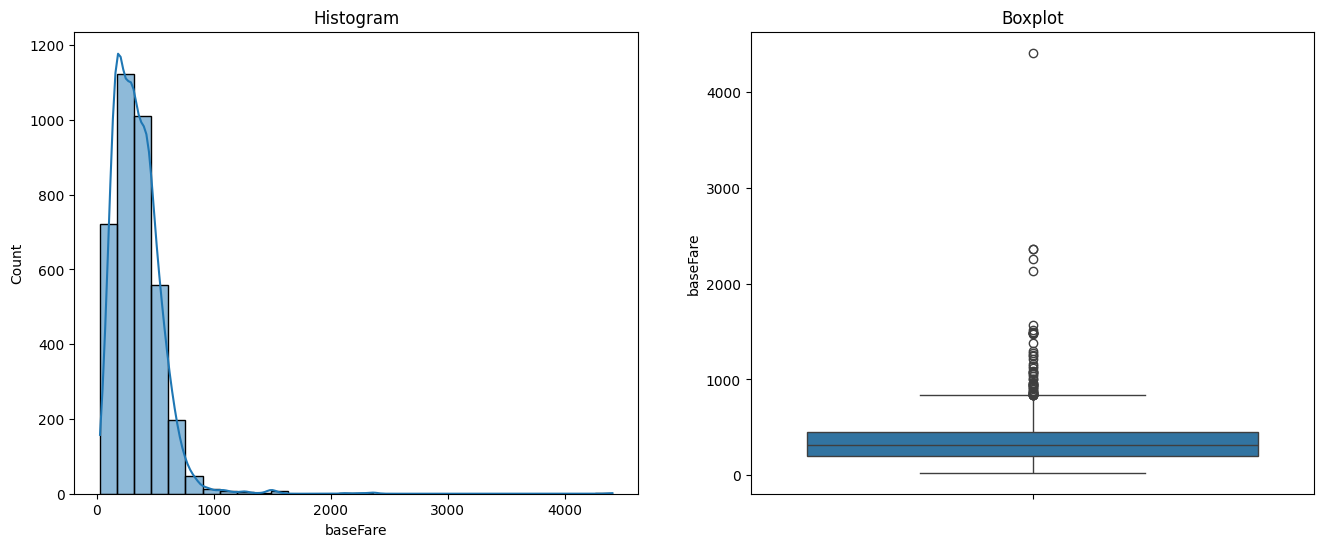

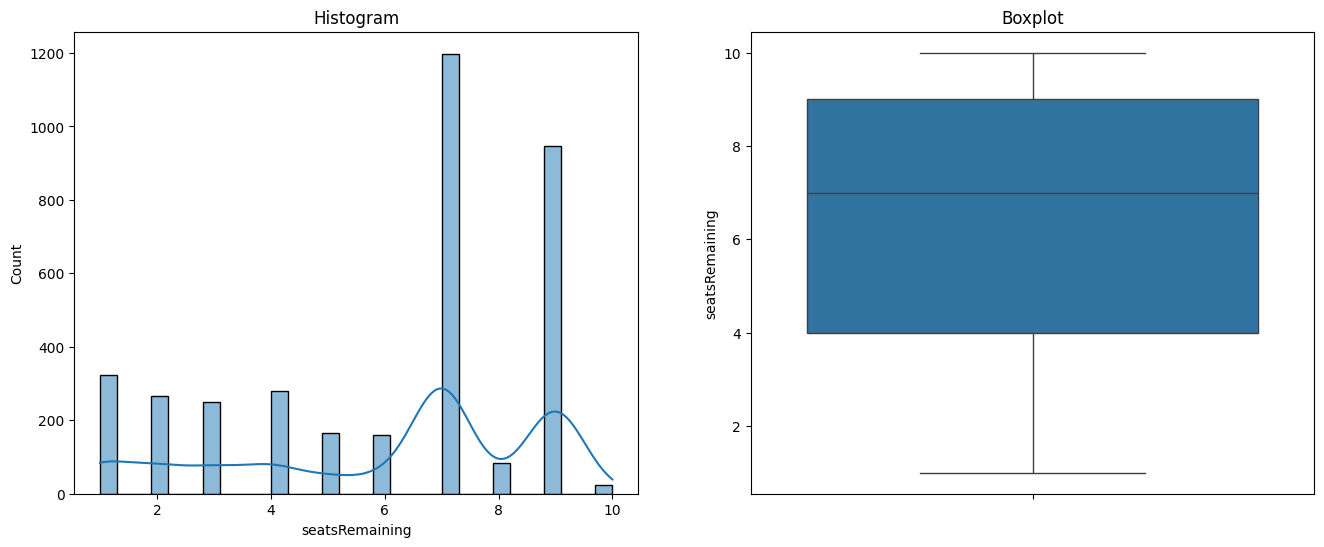

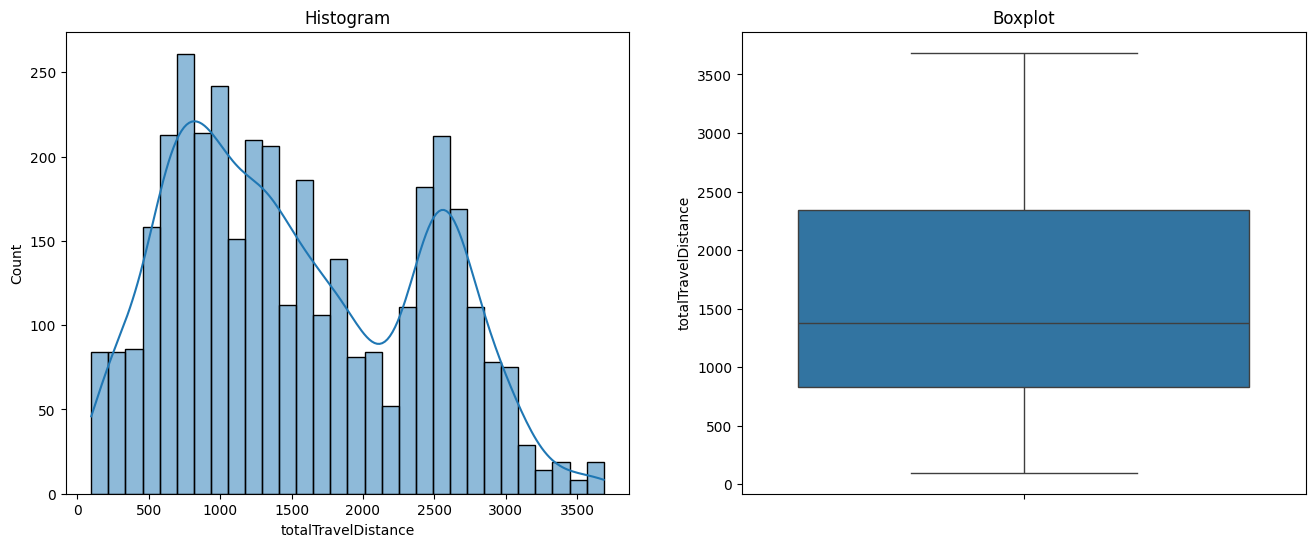

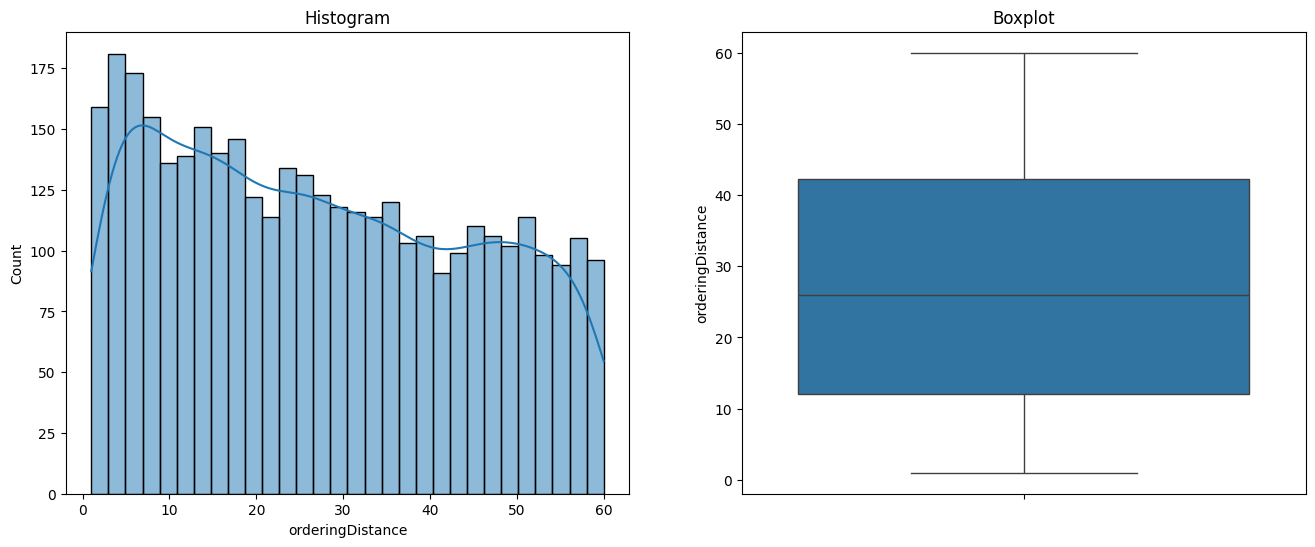

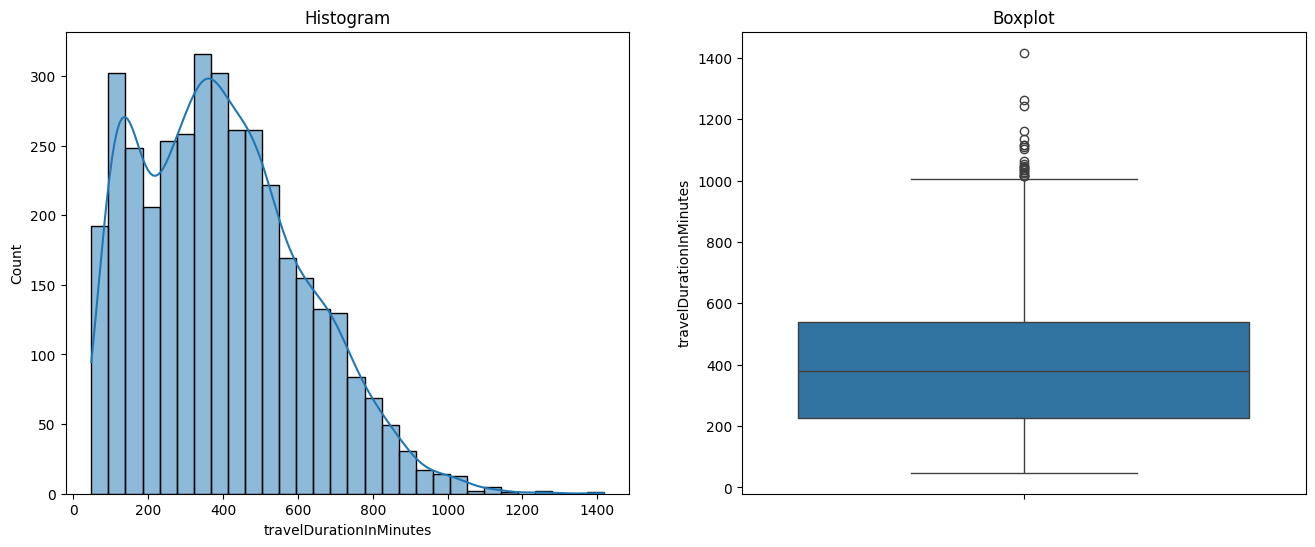

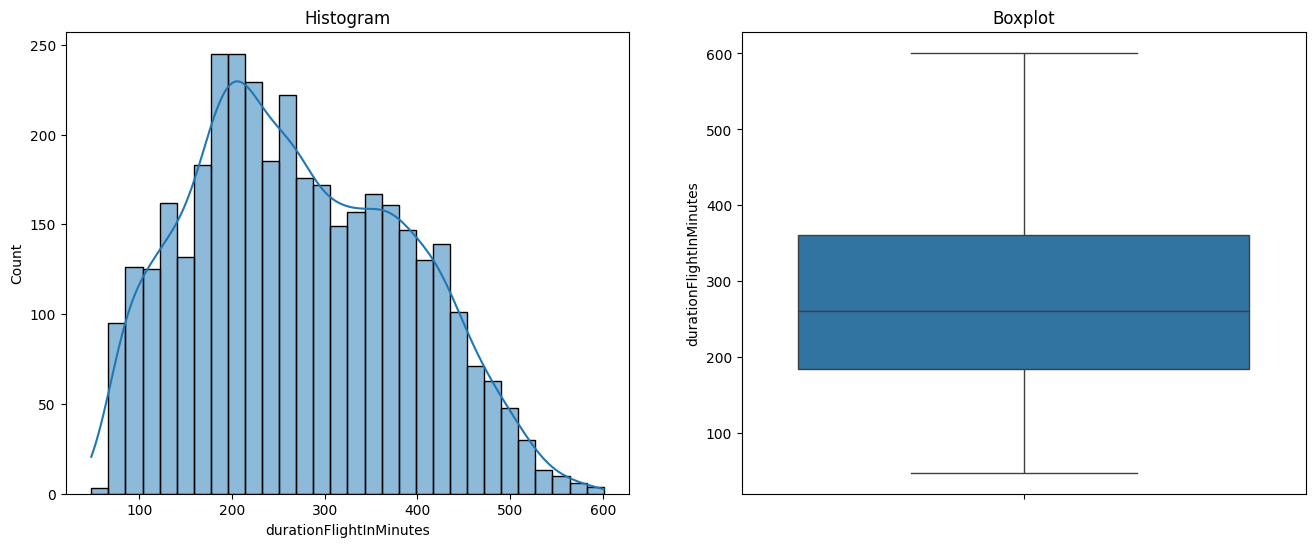

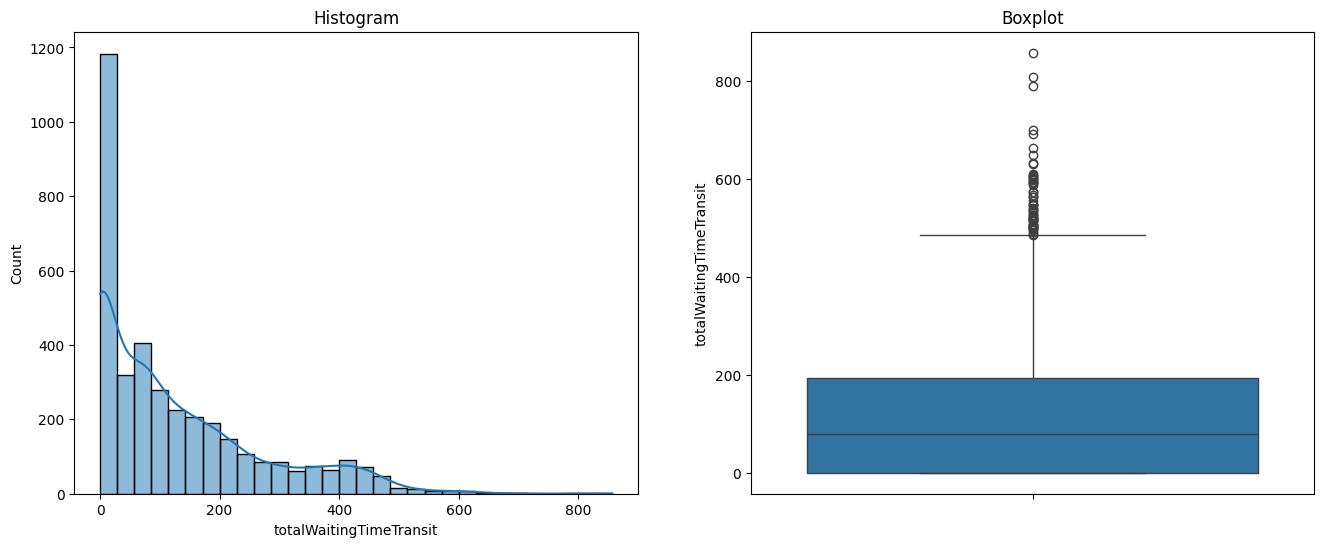

In [ ]:
# sekarang kita coba cek plot dari distribusinya
for kolom in num_columns:
    plot_distribution_boxplot(x_train_7, kolom)

Insight:
* Berdasarkan hasil *ploting*, meskipun datanya tidak terhitung normal namun tidak banyak juga kolom yang memiliki *outlier*. Maka dari itu, saya memutuskan untuk membiarkan *outlier*-nya untuk menjaga variabilitasnya pula.

## FE - Scaling

Kita lakukan *scaling* untuk data numerik yang ada. Untuk scaling yang diterapkan adalah *StandardScaler* dengan asumsi data ini mendekati normal.

In [ ]:
# kita scaling dengan StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_7[num_columns])

StandardScaler()

In [ ]:
# kita terapkan
x_train_scaled = scaler.transform(x_train_7[num_columns])
x_test_scaled = scaler.transform(x_test_7[num_columns])

## FE - Encoding

Untuk bagian *encoding*, saya hanya terapkan dengan *One-Hot* karena untuk *OrdinalEncoding* sebenarnya pada tipe kolom ordinal sudah menggunakan angka jadi rasanya tidak perlu lagi di *encoding*.

In [ ]:
# one-hot untuk data numerik

ohe = OneHotEncoder(handle_unknown='ignore')

x_train_ohe = ohe.fit_transform(x_train_7[cat_columns_ohe]).toarray()
x_test_ohe = ohe.transform(x_test_7[cat_columns_ohe]).toarray()

In [ ]:
# kita buat dataframe dari hasil encoding
enc_ohe_train = pd.DataFrame(x_train_ohe, columns=ohe.get_feature_names_out())
enc_ohe_test = pd.DataFrame(x_test_ohe, columns=ohe.get_feature_names_out())

In [ ]:
# kita cek
enc_ohe_train

,elapsedDays_0,elapsedDays_1,isBasicEconomy_0,isBasicEconomy_1,isNonStop_0,isNonStop_1,startingAirport_ATL,startingAirport_BOS,startingAirport_CLT,startingAirport_DEN,...,firstDepartureAirlineCode_F9,firstDepartureAirlineCode_KG,firstDepartureAirlineCode_SY,firstDepartureAirlineCode_UA,seasonDeparture_spring,seasonDeparture_summer,firstCabinCode_business,firstCabinCode_coach,firstCabinCode_first,firstCabinCode_premium coach
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3692,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3693,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3694,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# kita satukan data scaling dan encoding
x_train_scaled_enc = np.concatenate([x_train_scaled, enc_ohe_train, x_train_7[cat_columns_notenc]], axis=1)
x_test_scaled_enc = np.concatenate([x_test_scaled, enc_ohe_test, x_test_7[cat_columns_notenc]], axis=1)

In [ ]:
# kita buat dataframenya
df_x_train_scaled_enc = pd.DataFrame(x_train_scaled_enc, columns=[num_columns + list(ohe.get_feature_names_out()) + cat_columns_notenc])
df_x_test_scaled_enc = pd.DataFrame(x_test_scaled_enc, columns=[num_columns + list(ohe.get_feature_names_out()) + cat_columns_notenc])

In [ ]:
# kita cek
df_x_train_scaled_enc

,baseFare,seatsRemaining,totalTravelDistance,orderingDistance,travelDurationInMinutes,durationFlightInMinutes,totalWaitingTimeTransit,elapsedDays_0,elapsedDays_1,isBasicEconomy_0,...,seasonDeparture_spring,seasonDeparture_summer,firstCabinCode_business,firstCabinCode_coach,firstCabinCode_first,firstCabinCode_premium coach,isRefundable,monthDeparture,firstHourDeparture,sumFlight
0,-0.615954,-1.514198,-0.256140,0.656042,0.109701,-0.250839,0.373906,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,10.0,2.0
1,0.054928,1.110263,0.661304,-0.834618,0.451340,0.858237,-0.003668,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,15.0,2.0
2,-0.870863,0.360417,-0.857143,-1.465282,-0.702845,-0.801011,-0.431111,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,15.0,2.0
3,-0.061373,-1.139275,0.005987,-1.293283,-0.250404,-0.084914,-0.317126,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,2.0
4,0.104112,0.360417,0.439322,0.828041,0.109701,0.351730,-0.117653,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,-0.347582,-1.889121,-0.925627,0.541376,-1.136818,-1.045531,-0.901298,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,19.0,1.0
3692,0.493256,-1.139275,0.649496,0.082711,1.000732,0.666114,1.000822,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,19.0,2.0
3693,-0.164212,0.360417,1.396912,-0.146621,1.937930,1.155155,2.048057,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,21.0,2.0
3694,0.287482,0.360417,0.096904,-1.350616,0.963798,0.168340,1.349901,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,13.0,2.0


Insight:
* Kita sudah dapatkan hasil *encoding*-nya dan sudah kita satukan dalam *dataframe* bersama data yang sudah di *scaling*.

## FE - Selection

Disini kita akan uji korelasi antara setiap *feature* dengan target. Data target bersifat numerik, maka untuk pengujian numerik ke numerik saya gunakan *spearman* yang lebih tahan terhadap *outlier* sementara untuk katergorik ke numerik saya gunakan *kendall*.

In [ ]:
# kita buat function untuk melihat korelasi antara feature dan target

# kita buat function untuk feature numerik
def selectionFeaturesNum(data_train, feature_num, data_test, target):
  have_corr = []
  have_no_corr = []
  good_relation = []
  bad_relation = []

  # kita buat looping
  for kolom in feature_num:
    # kita gunakan Kendall
    spear_value, p_value = stats.spearmanr(data_train[kolom], data_test[target])

    # kita buat kriteria p value
    if p_value > 0.05:
      have_no_corr.append(kolom)
    else:
      have_corr.append(kolom)

    # kita buat kriteria korelasi
    if spear_value >= 0.5 or spear_value <= -0.5:
      good_relation.append(kolom)
    else:
      bad_relation.append(kolom)

  return have_corr, have_no_corr, good_relation, bad_relation

In [ ]:
# kita buat function untuk feature kategorik
def selectionFeaturesCat(data_train, feature_cat, data_test, target):
  have_corr = []
  have_no_corr = []
  good_relation = []
  bad_relation = []

  # kita buat looping
  for kolom in feature_cat:
    # kita gunakan Kendall
    kendall_value, p_value = stats.kendalltau(data_train[kolom], data_test[target])

    # kita buat kriteria p value
    if p_value > 0.05:
      have_no_corr.append(kolom)
    else:
      have_corr.append(kolom)

    # kita buat kriteria korelasi
    if kendall_value >= 0.5 or kendall_value <= -0.5:
      good_relation.append(kolom)
    else:
      bad_relation.append(kolom)

  return have_corr, have_no_corr, good_relation, bad_relation

In [ ]:
# kita jalankan function-nya untuk selection feature numerik
have_corr, have_no_corr, good_relation, bad_relation = selectionFeaturesNum(x_train_7, num_columns, y_train_1, 'totalFare')

In [ ]:
# sekarang kita coba lihat hasilnya untuk feature numerik
print(f'Feature numerik yang memiliki korelasi dengan target: {have_corr}')
print(f'Feature numerik yang tidak memiliki korelasi dengan target: {have_no_corr}')
print(f'Feature numerik yang punya korelasi bagus dengan target: {good_relation}')
print(f'Feature numerik yang punya korelasi jelek dengan target: {bad_relation}')

Feature numerik yang memiliki korelasi dengan target: ['baseFare', 'seatsRemaining', 'totalTravelDistance', 'travelDurationInMinutes', 'durationFlightInMinutes', 'totalWaitingTimeTransit']
Feature numerik yang tidak memiliki korelasi dengan target: ['orderingDistance']
Feature numerik yang punya korelasi bagus dengan target: ['baseFare', 'totalTravelDistance', 'travelDurationInMinutes', 'durationFlightInMinutes']
Feature numerik yang punya korelasi jelek dengan target: ['seatsRemaining', 'orderingDistance', 'totalWaitingTimeTransit']


In [ ]:
# kita jalankan function-nya untuk selection feature kategorik
have_corr, have_no_corr, good_relation, bad_relation = selectionFeaturesCat(x_train_7, cat_columns, y_train_1, 'totalFare')

In [ ]:
# sekarang kita coba lihat hasilnya untuk feature kategorik
print(f'Feature numerik yang memiliki korelasi dengan target: {have_corr}')
print(f'Feature numerik yang tidak memiliki korelasi dengan target: {have_no_corr}')
print(f'Feature numerik yang punya korelasi bagus dengan target: {good_relation}')
print(f'Feature numerik yang punya korelasi jelek dengan target: {bad_relation}')

Feature numerik yang memiliki korelasi dengan target: ['startingAirport', 'destinationAirport', 'elapsedDays', 'isBasicEconomy', 'isNonStop', 'isRefundable', 'monthDeparture', 'sumFlight', 'firstDepartureAirlineCode', 'seasonDeparture', 'firstCabinCode']
Feature numerik yang tidak memiliki korelasi dengan target: ['firstHourDeparture']
Feature numerik yang punya korelasi bagus dengan target: []
Feature numerik yang punya korelasi jelek dengan target: ['startingAirport', 'destinationAirport', 'elapsedDays', 'isBasicEconomy', 'isNonStop', 'isRefundable', 'monthDeparture', 'firstHourDeparture', 'sumFlight', 'firstDepartureAirlineCode', 'seasonDeparture', 'firstCabinCode']


Insight:
* Kalau kita gabungkan hasil uji korelasi keduanya, diketahui bahwa *feature* `orderingDistance` dan `firstHourDeparture` ternyata tidak cukup bukti bahwa keduanya tidak punya korelasi dengan target.
* Maka dari itu, dua *feature* tersebut tidak akan kita bawa dalam pemodelan.

In [ ]:
# dari harsil selection, didapatkan bahwa feature orderingDistance dan firstHourDeparture tidak punya korelasi dengan target
x_train_8 = df_x_train_scaled_enc.drop(['orderingDistance', 'firstHourDeparture'], axis=1)
x_test_8 = df_x_test_scaled_enc.drop(['orderingDistance', 'firstHourDeparture'], axis=1)

C:\Users\ARIF\AppData\Local\Temp\ipykernel_404\716986069.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x_train_8 = df_x_train_scaled_enc.drop(['orderingDistance', 'firstHourDeparture'], axis=1)
C:\Users\ARIF\AppData\Local\Temp\ipykernel_404\716986069.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x_test_8 = df_x_test_scaled_enc.drop(['orderingDistance', 'firstHourDeparture'], axis=1)


In [ ]:
# kita cek
x_train_8

,baseFare,seatsRemaining,totalTravelDistance,travelDurationInMinutes,durationFlightInMinutes,totalWaitingTimeTransit,elapsedDays_0,elapsedDays_1,isBasicEconomy_0,isBasicEconomy_1,...,firstDepartureAirlineCode_UA,seasonDeparture_spring,seasonDeparture_summer,firstCabinCode_business,firstCabinCode_coach,firstCabinCode_first,firstCabinCode_premium coach,isRefundable,monthDeparture,sumFlight
0,-0.615954,-1.514198,-0.256140,0.109701,-0.250839,0.373906,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,2.0
1,0.054928,1.110263,0.661304,0.451340,0.858237,-0.003668,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,2.0
2,-0.870863,0.360417,-0.857143,-0.702845,-0.801011,-0.431111,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,2.0
3,-0.061373,-1.139275,0.005987,-0.250404,-0.084914,-0.317126,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,2.0
4,0.104112,0.360417,0.439322,0.109701,0.351730,-0.117653,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,-0.347582,-1.889121,-0.925627,-1.136818,-1.045531,-0.901298,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0
3692,0.493256,-1.139275,0.649496,1.000732,0.666114,1.000822,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,2.0
3693,-0.164212,0.360417,1.396912,1.937930,1.155155,2.048057,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,2.0
3694,0.287482,0.360417,0.096904,0.963798,0.168340,1.349901,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,2.0


# Model Definition
---

Kita definisikan semua model yang akan diuji cobakan untuk mencari model terbaik. Model awal yang kita uji yaitu *LinearRegression*, *Lasso*, *Ridge*, *ElasticNet*, *KNeighborsRegressor*, *SVR*, *DecisionTreeRegressor* dan *RandomForestRegressor*. Lalu selanjutnya kita pilih model terbaik berdasarkan penilaian *cross_val_score* dengan *scoring* **RMSE**. Kemudian untuk lebih optimal dalam pemodelan kita akan terapkan *Hyperparameter Tunning*.

## Trial All Model Default

In [ ]:
# kita langsung lihat evaluasinya dengan cross_val_score
model_linreg = LinearRegression()
eval_rmse = np.mean(-cross_val_score(model_linreg, x_train_8, y_train_1, cv=10, scoring='neg_root_mean_squared_error'))
print(f'Score RMSE with Cross Validation: {eval_rmse}')

Score RMSE with Cross Validation: 3695897549.2529435


In [ ]:
# ini untuk Lasso
model_lasso = Lasso(random_state=42)
eval_rmse = np.mean(-cross_val_score(model_lasso, x_train_8, y_train_1, cv=10, scoring='neg_root_mean_squared_error'))
print(f'Score RMSE with Cross Validation: {eval_rmse}')

Score RMSE with Cross Validation: 2.5285923934367665


In [ ]:
# ini untuk Ridge
model_ridge = Ridge(random_state=42)
eval_rmse = np.mean(-cross_val_score(model_ridge, x_train_8, y_train_1, cv=10, scoring='neg_root_mean_squared_error'))
print(f'Score RMSE with Cross Validation: {eval_rmse}')

Score RMSE with Cross Validation: 1.2166884770830464


In [ ]:
# ini untuk ElasticNet
model_elastic = ElasticNet(random_state=42)
eval_rmse = np.mean(-cross_val_score(model_linreg, x_train_8, y_train_1, cv=10, scoring='neg_root_mean_squared_error'))
print(f'Score RMSE with Cross Validation: {eval_rmse}')

Score RMSE with Cross Validation: 3695897549.2529435


In [ ]:
# ini untuk KNR
model_knr = KNeighborsRegressor()
eval_rmse = np.mean(-cross_val_score(model_knr, x_train_8, y_train_1, cv=10, scoring='neg_root_mean_squared_error'))
print(f'Score RMSE with Cross Validation: {eval_rmse}')

Score RMSE with Cross Validation: 84.32904248557165


In [ ]:
# ini untuk  SVR
model_svr = SVR()
eval_rmse = np.mean(-cross_val_score(model_svr, x_train_8, y_train_1, cv=10, scoring='neg_root_mean_squared_error'))
print(f'Score RMSE with Cross Validation: {eval_rmse}')

c:\Users\ARIF\miniconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARIF\miniconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARIF\miniconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARIF\miniconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Score RMSE with Cross Validation: 159.01576127723106


In [ ]:
# ini untuk DTR
model_dtr = DecisionTreeRegressor(random_state=42)
eval_rmse = np.mean(-cross_val_score(model_dtr, x_train_8, y_train_1, cv=10, scoring='neg_root_mean_squared_error'))
print(f'Score RMSE with Cross Validation: {eval_rmse}')

Score RMSE with Cross Validation: 18.139738316453887


In [ ]:
# ini untuk RFR
model_rfr = RandomForestRegressor(random_state=42)
eval_rmse = np.mean(-cross_val_score(model_rfr, x_train_8, y_train_1, cv=10, scoring='neg_root_mean_squared_error'))
print(f'Score RMSE with Cross Validation: {eval_rmse}')

c:\Users\ARIF\miniconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ARIF\miniconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ARIF\miniconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ARIF\miniconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Score RMSE with Cross Validation: 21.652303912295462


Insight:
* Kita dapatkan skor **RMSE** paling kecil ada pada model *Ridge*.

## Hyperparameter Tunning

Setelah kita dapatkan model yang bagus, kita optimalkan *hyperparameter*-nya.

In [ ]:
# kita definisikan hyperparameter
grid_search_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search_params

{'alpha': [0.01, 0.1, 1, 10, 100]}

In [ ]:
# kita gunakan GridSearch
rid_gridcv = GridSearchCV(estimator=model_ridge,
                         param_grid=grid_search_params,
                         cv=10,
                         n_jobs=-1,
                         verbose=2,
                         scoring='neg_root_mean_squared_error')

# Model Training
---

Disini kita coba jalankan *hyperparameter*-nya dan mencoba menggunakan *pipeline* serta *boosting*. 

## Hyperparameter Tunning

In [ ]:
# kita lakukan fit
rid_gridcv.fit(x_train_8, y_train_1)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
# Hyperparameter terbaik
rid_gridcv.best_params_

{'alpha': 0.1}

In [ ]:
# Estimator terbaik
rid_gridcv_best = rid_gridcv.best_estimator_

## With Pipeline After Hyperparameter Tunning

Kita buat sebuah *pipeline* dengan menggunakan model yang sudah dioptimalkan.

In [ ]:
# kita sesuaikan dataframe yang akan digunakan
x_train_9 = x_train_7.drop(['orderingDistance', 'firstHourDeparture'], axis=1)
x_test_9 = x_test_7.drop(['orderingDistance', 'firstHourDeparture'], axis=1)

In [ ]:
# kemudian kita set kembali data kolom numerik dan kategorik
num_columns_pip = ['baseFare', 'seatsRemaining', 'totalTravelDistance', 'travelDurationInMinutes', 'durationFlightInMinutes', 'totalWaitingTimeTransit']
cat_columns_ohe_pip = ['elapsedDays', 'isBasicEconomy', 'isNonStop', 'startingAirport', 'destinationAirport', 'firstDepartureAirlineCode', 'seasonDeparture', 'firstCabinCode']
cat_columns_notenc_pip = ['isRefundable', 'monthDeparture', 'sumFlight']

In [ ]:
# kita buat pipeline

num_pipeline = make_pipeline(StandardScaler())

cat_pipeline_ohe = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns_pip),
    ('pipe_cat_ohe', cat_pipeline_ohe, cat_columns_ohe_pip)
])

pip_ridge = make_pipeline(preprocessing_pipeline, Ridge(alpha=0.1, random_state=42))

# kita lakukan fit
pip_ridge.fit(x_train_9, y_train_1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['baseFare', 'seatsRemaining',
                                                   'totalTravelDistance',
                                                   'travelDurationInMinutes',
                                                   'durationFlightInMinutes',
                                                   'totalWaitingTimeTransit']),
                                                 ('pipe_cat_ohe',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['elapsedDays',
                                                   'isBasicEconomy',
                                                   'isNonStop',
                                                   'startingAirport',
                                                   'destinationAirport',
                                                   'firstDepartureAirlineCode',
                                                   'seasonDeparture',
                                                   'firstCabinCode'])])),
                ('ridge', Ridge(alpha=0.1, random_state=42))])

## With Boosting

Untuk *boosting* juga akan saya gunakan algoritma yang sudah dipilih sebelumnya.

In [ ]:
# kita definisikan metode boosting dengan algoritma Ridge
ada_reg = AdaBoostRegressor(estimator=rid_gridcv_best, n_estimators=500, random_state=42)

In [ ]:
# kita lakukan fit
ada_reg.fit(x_train_8, y_train_1)

c:\Users\ARIF\miniconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(estimator=Ridge(alpha=0.1, random_state=42), n_estimators=500,
                  random_state=42)

# Model Evaluation
---

Kita lakukan evaluasi pada data *train* dan *test* dengan metrik **RMSE** karena kita ingin fokus pada kesalahan sekecil apapun. Hal ini karena harga tiket pesawat tidak murah, jika terjadi kesalahan prediksi akan banyak uang yang dikeluarkan untuk berjaga-jaga.

## Hyperparameter Tunning

In [ ]:
# kita lakukan cek performansi dengan metriks RMSE
y_pred_train = rid_gridcv_best.predict(x_train_8)
y_pred_test = rid_gridcv_best.predict(x_test_8)

print('RMSE - Train Set: ', root_mean_squared_error(y_train_1, y_pred_train))
print('RMSE - Test Set : ', root_mean_squared_error(y_test_1, y_pred_test))

RMSE - Train Set:  1.185108753266376
RMSE - Test Set :  1.1818464179525447


## With Pipeline After Hyperparameter Tunning

In [ ]:
# kita lakukan cek performansi dengan metriks RMSE
y_pred_train = pip_ridge.predict(x_train_9)
y_pred_test = pip_ridge.predict(x_test_9)

print('RMSE - Train Set: ', root_mean_squared_error(y_train_1, y_pred_train))
print('RMSE - Test Set : ', root_mean_squared_error(y_test_1, y_pred_test))

RMSE - Train Set:  1.299816986215876
RMSE - Test Set :  1.349885852119718


## With Boosting

In [ ]:
# kita lakukan cek performansi dengan metriks RMSE
y_train_pred = ada_reg.predict(x_train_8)
y_test_pred = ada_reg.predict(x_test_8)

print('RMSE - Train - AdaBoost: ', root_mean_squared_error(y_train_1, y_pred_train))
print('RMSE - Test - AdaBoost : ', root_mean_squared_error(y_test_1, y_pred_test))

RMSE - Train - AdaBoost:  1.299816986215876
RMSE - Test - AdaBoost :  1.349885852119718


Insight:
* Terlihat dari hasil metriks, dengan proses manual bertahap (tanpa *pipeline*) menghasilkan nilai RMSE yang kecil yaitu 1.18 dimana ini sebenarnya tidak jauh berbeda ketika menggunakan algoritma defaultnya.
* Meskipun begitu, hasil ini merupakan yang terbaik dari jenis algoritma yang telah diujikan sebelumnya.

# Model Saving
---

Untuk model prediksi yang telah dibuat dan pilih, kini kita simpan dengan *pickel* dan *json* bersama beberapa file lain yang akan digunakan.

In [ ]:
# kita simpan 
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols_enc.txt', 'w') as file_2:
  json.dump(cat_columns_ohe, file_2)

with open('standard_scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('ohe_encoder.pkl', 'wb') as file_4:
  pickle.dump(ohe, file_4)

with open('model_regresi.pkl', 'wb') as file_5:
  pickle.dump(rid_gridcv_best, file_5)

with open('list_cat_cols_notenc.txt', 'w') as file_6:
  json.dump(cat_columns_notenc, file_6)

# Conclusion
---

Ada beberapa hal yang bisa disimpulkan dari proses yang telah dilalui untuk pemodelan ini yaitu:
1. Dataset yang digunakan adalah data mengenai informasi pemesanan tiket penerbangan di *Expedia*.
2. Dikarenakan jumalah datanya terlalu banyak, diterapkanlah teknik *sampling* untuk mengambil dataset yang akan digunakan.
3. Ada beberapa kolom yang berisi lebih dari 1 nilai.
4. Model terbaik yang bisa dipilih yaitu algoritma *Ridge*.
5. Nilai dari metriks RMSE hasil pemodelan sekitar 1.18

# Conceptual Problem
---

Berikut beberapa pertanyaan yang perlu dijawab.

1. Berikan penjelasan latar belakang adanya bagging dan cara kerja *bagging*!
    - *Bagging* sendiri merupakan singkatan dari *Boostrapping* dan *Aggregate*. Latar belakang adanya *bagging* ini mungkin untuk mendapatkan model prediksi yang cukup baik jika diterapkan. Cara kerjanya sendiri untuk *bagging* dimana data sampel diambil secara acak sebanyak `n_estimators` lalu dari dilakukan pemodelan berdasarkan algoritma yang dipilih. Untuk defaultnya menggunakan metode *Random Forest*, namun jika ingin diganti juga bisa. Setelah mendapat hasil prediksinya, nilai prediksi setiap nilai akan dirata-rata jika ingin digunakan untuk regresi. Namun jika ingin digunakan untuk klasifikasi bisa menggunakan modus/mode.

2. Apa perbedaan cara kerja algoritma *Random Forest* dengan algoritma boosting yang Anda pilih!
    - Kebetulan untuk *boosting* saya gunakan model yang sudah dipilih berdasarkan pengujian awal yaitu *Ridge*. Perbedaannya jelas dari algoritma *Random Forest* menitikberatkan pada konsep 'membagi' data dengan kriteria tertentu hingga kedalaman yang dibatasi atau juga tidak. Kelebihannya dia tidak masalah jika adanya *outlier* didalam data karena dia juga bukan menggunakan konsep jarak seperti *SVM* atau *KNN*. Untuk Ridge sendiri termasuk dalam kategori regularisasi dimana kinerja model ini dengan menambahkan 'penalti' terhadap koefisien yang besar dalam regeresi tersebut dan mampu mengurangi *overfitting*.

3. Jelaskan apa yang dimaksud dengan *Cross Validation*!
    - *Cross Validation* sendiri adalah metode untuk menguji perfomansi model ketika masih berada dalam *train*. Dia akan membagi data *train* menjadi beberapa bagian dan mengambil sepersekian persen dari data tersebut untuk dijadikan data pengujian dan sisanya untuk *training*. Proses ini akan diulang dengan sehingga semua bagian dapat menjadi data pengujian.